In [23]:
import pandas as pd
import numpy as np
import csv
from itertools import combinations,product

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
mpl.rcParams.update(mpl.rcParamsDefault)

# import warnings
# warnings.filterwarnings("ignore")

# divs = lambda x, y: np.divide(np.array([x], dtype=float), np.array([y], dtype=float), out=np.full_like(np.array([x], dtype=float), np.nan), where=np.array([y], dtype=float)!=0)


In [5]:
mss=50
fontssize=50
mpl.rcParams.update({
    'figure.figsize': (23.6,12.6),
    'font.family': 'serif',
    'font.serif': ['Liberation Sans'],  # Add or remove font names as needed
    'font.size': fontssize,  # Adjust as needed
    #'font.weight': 'bold',
    "svg.fonttype": 'none',
    'text.usetex': False,
    'axes.linewidth' : 2,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{cmbright}',
    'xtick.labelsize' : fontssize, # fontsize of the x tick labels
    'ytick.labelsize' : fontssize # fontsize of the y tick labels
})
ticks_font = font_manager.FontProperties(family='Liberation Sans', style='normal',
    size=fontssize, weight='bold', stretch='normal')

In [6]:
def avg_rows(df,operation,rat,poss):
   op_tmps=df.query('OP=="'+operation+'"')[['N1_NeuID', 'N1_DID', 'N1_GID', 'N2_NeuID', 'N2_DID', 'N2_GID', 
         'Nspikes', 'MSR', 'MHK', 'MHS', 'dt_MHK', 'OHK', 'OHS', 'dt_OHK','max_HSHK']].mean().to_frame().T
   op_tmps=op_tmps.astype({'N1_NeuID':int, 'N1_DID':int, 'N1_GID':int, 'N2_NeuID':int, 'N2_DID':int, 'N2_GID':int})
   op_tmps.insert(0, 'Rat_ID', rat)
   assert np.array_equal(df.U_LOC.values,df.N_LOC.values)
   op_tmps.insert(1, 'LOC', df.U_LOC.values[0])
   if poss:
      sdd=df.query('OP=="possNA"')[['MSR', 'MHK', 'MHS', 'dt_MHK', 'OHK', 'OHS', 'dt_OHK','max_HSHK']].max().to_frame().T
   else:
      sdd=df.query('OP=="NA"')[['MSR', 'MHK', 'MHS', 'dt_MHK', 'OHK', 'OHS', 'dt_OHK','max_HSHK']].max().to_frame().T
   sdd.rename(columns={col: 'Rmax_'+col for col in sdd.columns}, inplace=True)
   op_tmps = pd.concat([op_tmps,sdd], axis=1)
   return op_tmps

In [ ]:
# # Activate for Single recording plots
# # rats=[20382,24101,21012,22295,20630,22098,23783,24116]
# path="../data_bool/"

# chunksize=20 #in minutes
# #rat=24101
# rat=22295
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_Nresrel_data.json")
# #df = df.fillna(0) ##Donot activate, it interferes with the NA values

# #rec_gids=df.Rec_GID.unique()
# # rgid=3378


# df_AND=pd.DataFrame(); df_OR=pd.DataFrame(); df_XOR=pd.DataFrame()
# # For Poisson spike trains
# df_possAND=pd.DataFrame(); df_possOR=pd.DataFrame(); df_possXOR=pd.DataFrame()
# for i,j in df.groupby(['N1_DID','N2_DID']).groups:
#         tmps=df.query('N1_DID==' + str(i) + '& N2_DID==' + str(j))
#         df_AND=pd.concat([df_AND,avg_rows(tmps,"AND",rat,False)], ignore_index=True)
#         df_OR=pd.concat([df_OR,avg_rows(tmps,"OR",rat,False)], ignore_index=True)
#         df_XOR=pd.concat([df_XOR,avg_rows(tmps,"XOR",rat,False)], ignore_index=True)
#         # For Poisson spike trains
#         df_possAND=pd.concat([df_possAND,avg_rows(tmps,"possAND",rat,True)], ignore_index=True)
#         df_possOR=pd.concat([df_possOR,avg_rows(tmps,"possOR",rat,True)], ignore_index=True)
#         df_possXOR=pd.concat([df_possXOR,avg_rows(tmps,"possXOR",rat,True)], ignore_index=True)


In [7]:
# Activate for all recording plots
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
df = pd.DataFrame()
df_AND=pd.DataFrame(); df_OR=pd.DataFrame(); df_XOR=pd.DataFrame()
# For Poisson spike trains
df_possAND=pd.DataFrame(); df_possOR=pd.DataFrame(); df_possXOR=pd.DataFrame()
for ratid in rats:
    tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_Nresrel_data.json")
    #tmp_df = tmp_df.fillna(0) ##Donot activate, it interferes with the NA values
    for i,j in tmp_df.groupby(['N1_DID','N2_DID']).groups:
        tmps=tmp_df.query('N1_DID==' + str(i) + '& N2_DID==' + str(j))
        df_AND=pd.concat([df_AND,avg_rows(tmps,"AND",ratid,False)], ignore_index=True)
        df_OR=pd.concat([df_OR,avg_rows(tmps,"OR",ratid,False)], ignore_index=True)
        df_XOR=pd.concat([df_XOR,avg_rows(tmps,"XOR",ratid,False)], ignore_index=True)
        # For Poisson spike trains
        df_possAND=pd.concat([df_possAND,avg_rows(tmps,"possAND",ratid,True)], ignore_index=True)
        df_possOR=pd.concat([df_possOR,avg_rows(tmps,"possOR",ratid,True)], ignore_index=True)
        df_possXOR=pd.concat([df_possXOR,avg_rows(tmps,"possXOR",ratid,True)], ignore_index=True)

In [8]:
assert np.array_equal(df_OR.N1_GID.values,df_XOR.N1_GID.values)
assert np.array_equal(df_OR.N2_GID.values,df_XOR.N2_GID.values)
# For Poisson spike trains
assert np.array_equal(df_possOR.N1_GID.values,df_possXOR.N1_GID.values)
assert np.array_equal(df_possOR.N2_GID.values,df_possXOR.N2_GID.values)

## Investigating Differences between REC_resrel_data and Nresrel_data

In [9]:
# dt=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_REC_resrel_data.json")
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_Nresrel_data.json")

In [10]:
# cols=['U1_GID','U2_GID']
# ORIGINAL=dt.query('OP=="OR"')[['U1_GID','U2_GID']]
# NEW=df.query('OP=="OR"')[['U1_GID','U2_GID']]
# z = pd.merge(ORIGINAL, NEW, on=cols, how = 'outer', indicator=True)
# z = z[z._merge != 'both'] # Filter out records from both
# print(z)

In [11]:
# dfsd=pd.read_json(path2+"Rat_"+str(rat)+"_RECdata_extracted.json");
# for rowindex,row in dfsd.iterrows():
#     print(rowindex,row['REC_duration'],row['U_GIDs'],)

In [12]:
# for x,y in zip(dfsd.iloc[14].N_DIDs,dfsd.iloc[14].U_GIDs):
#     print(x,y)

## MSR (Averaged over neuron recordings) -- Individual Figures of the subplot for all recordings combined

In [ ]:
# quant='MSR'

# #qmin=0.245;qmax=0.305; #For MSR
# qmin=0.22;qmax=0.31; #For MSR

# #MSR
# xqmax=0.31;xqmin=0.25;

# Pxqmax=0.32;Pxqmin=0.22;

# yqmax=0.32;yqmin=-0.01;

In [ ]:
# quant='OHK'

# #For OHK
# qmin=0.1;qmax=0.6; 

# ##OHK
# xqmax=0.6;xqmin=0.1;

# Pxqmax=0.7;Pxqmin=0.1;

# yqmax=0.6;yqmin=-0.05;

In [118]:
quant='OHS'

#For OHS
qmin=0.5;qmax=1.1; 

##OHS
xqmax=1;xqmin=0.5;

Pxqmax=1;Pxqmin=0.2;

yqmax=1;yqmin=-0.05;

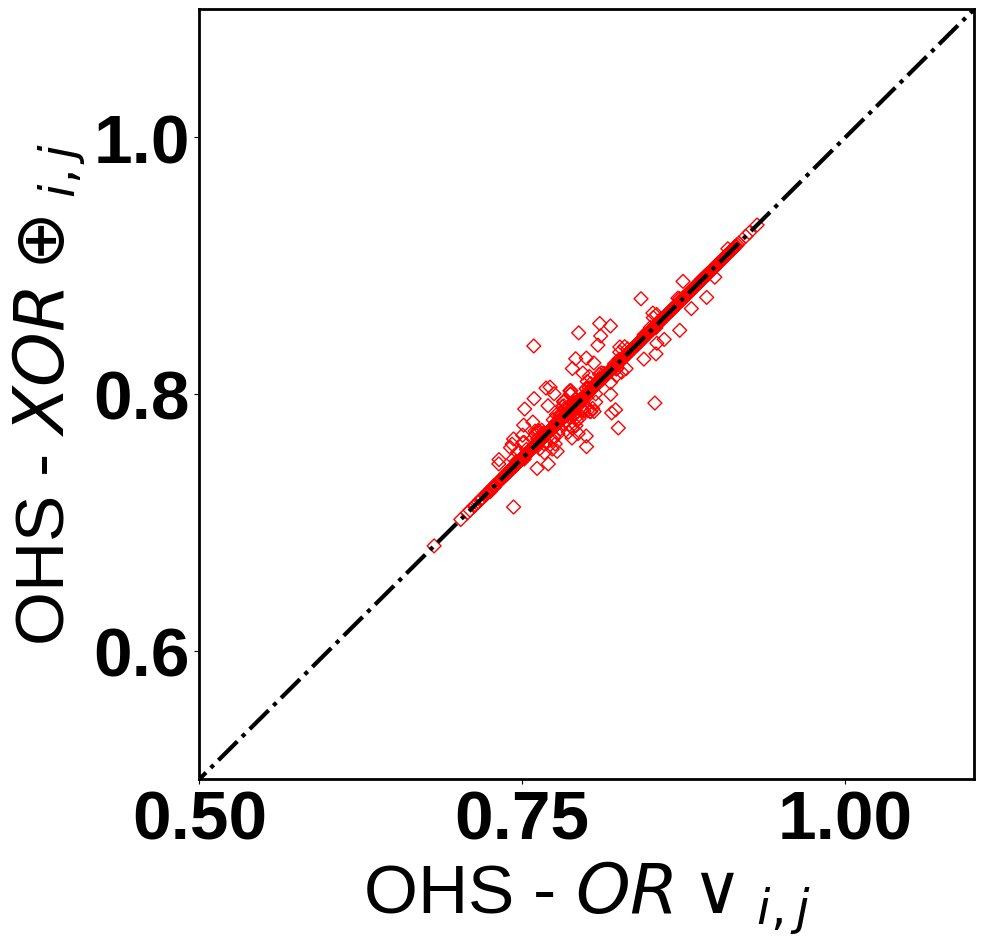

In [119]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname="../figures/CA1_"+quant+"_ORvXOR.pdf"

ax1.scatter(df_OR.query('LOC=="CA1"')[quant].values,df_XOR.query('LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
## Diagonal Line
ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) 

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

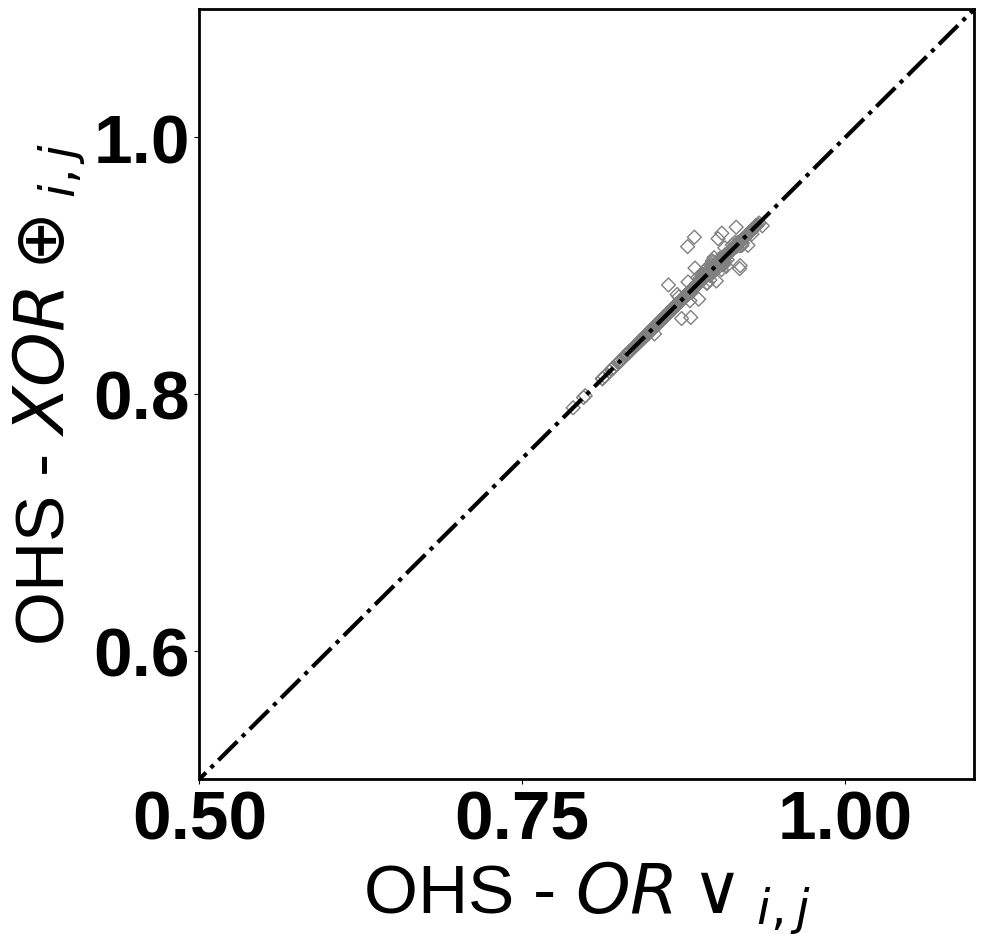

In [120]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname="../figures/CA1_"+quant+"_ORvXOR_poss.pdf"

ax1.scatter(df_possOR.query('LOC=="CA1"')[quant].values,df_possXOR.query('LOC=="CA1"')[quant].values, label='poss CA1 Neurons',  marker='D', facecolors='none',edgecolors='grey',s=mss)


ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [121]:
filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-9]+'.csv'

with open(filepath_plotdata, 'w', newline='') as csvfile:
    fieldnames = [quant+'-OR_CA1', quant+'-XOR_CA1',quant+'-PossOR_CA1',quant+'-PossXOR_CA1']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(
        {
            quant+'-OR_CA1':x, quant+'-XOR_CA1':y,quant+'-PossOR_CA1':z,quant+'-PossXOR_CA1':w
        } for x,y,z,w in zip(
            df_OR.query('LOC=="CA1"')[quant].values,
            df_XOR.query('LOC=="CA1"')[quant].values,
            df_possOR.query('LOC=="CA1"')[quant].values,
            df_possXOR.query('LOC=="CA1"')[quant].values
            )
    )

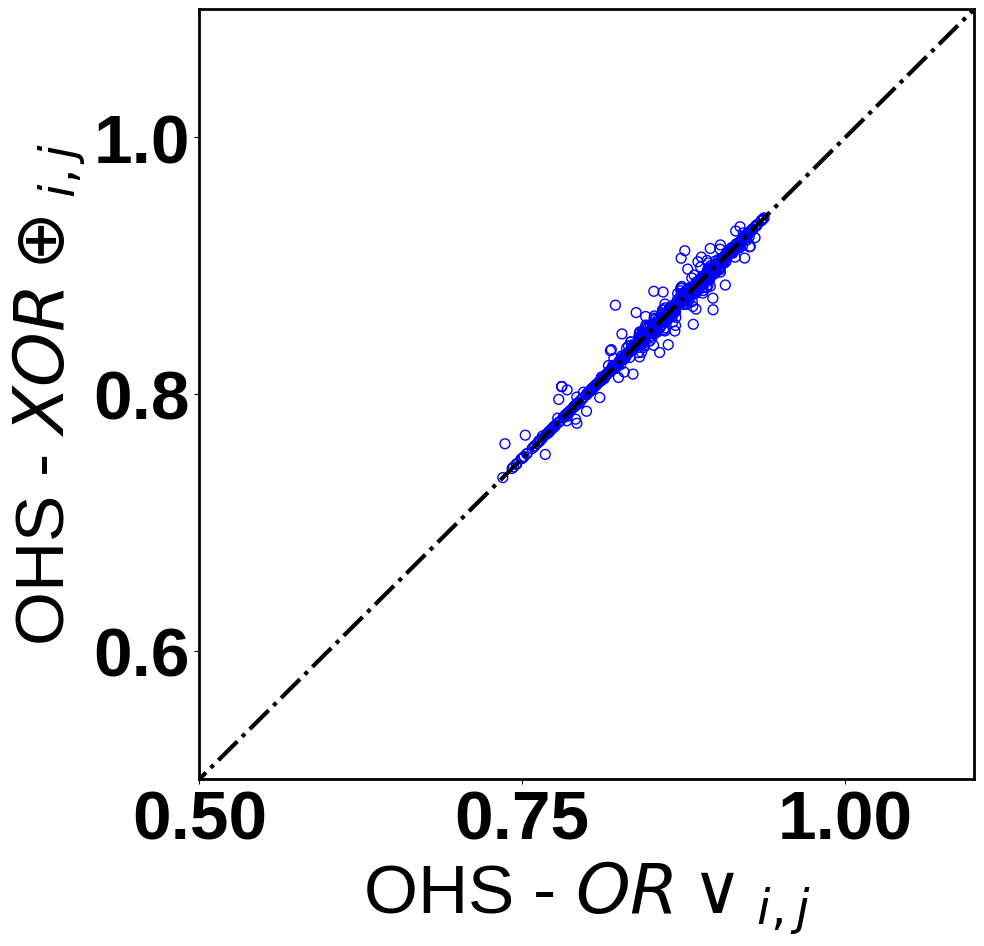

In [122]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname="../figures/SUB_"+quant+"_ORvXOR.pdf"

ax1.scatter(df_OR.query('LOC=="SUB"')[quant].values,df_XOR.query('LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

## Diagonal Line
ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) 
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

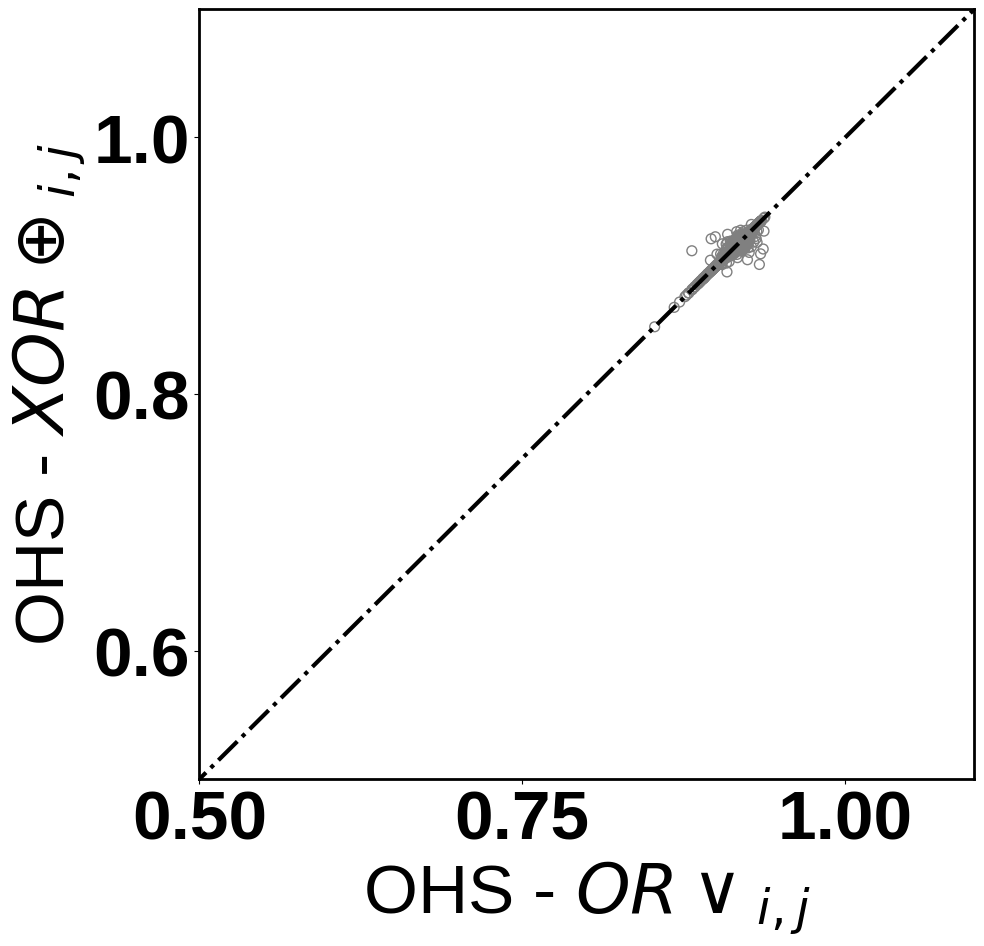

In [123]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname="../figures/SUB_"+quant+"_ORvXOR_poss.pdf"


#Poission Spike Trains
ax1.scatter(df_possOR.query('LOC=="SUB"')[quant].values,df_possXOR.query('LOC=="SUB"')[quant].values, label='poss SUB Neurons',  marker='o', facecolors='none',edgecolors='grey',s=mss)



ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [124]:
filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-9]+'.csv'

with open(filepath_plotdata, 'w', newline='') as csvfile:
    fieldnames = [quant+'-OR_SUB', quant+'-XOR_SUB',quant+'-PossOR_SUB',quant+'-PossXOR_SUB']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(
        {
            quant+'-OR_SUB':x, quant+'-XOR_SUB':y,quant+'-PossOR_SUB':z,quant+'-PossXOR_SUB':w
        } for x,y,z,w in zip(
            df_OR.query('LOC=="SUB"')[quant].values,
            df_XOR.query('LOC=="SUB"')[quant].values,
            df_possOR.query('LOC=="SUB"')[quant].values,
            df_possXOR.query('LOC=="SUB"')[quant].values
            )
    )

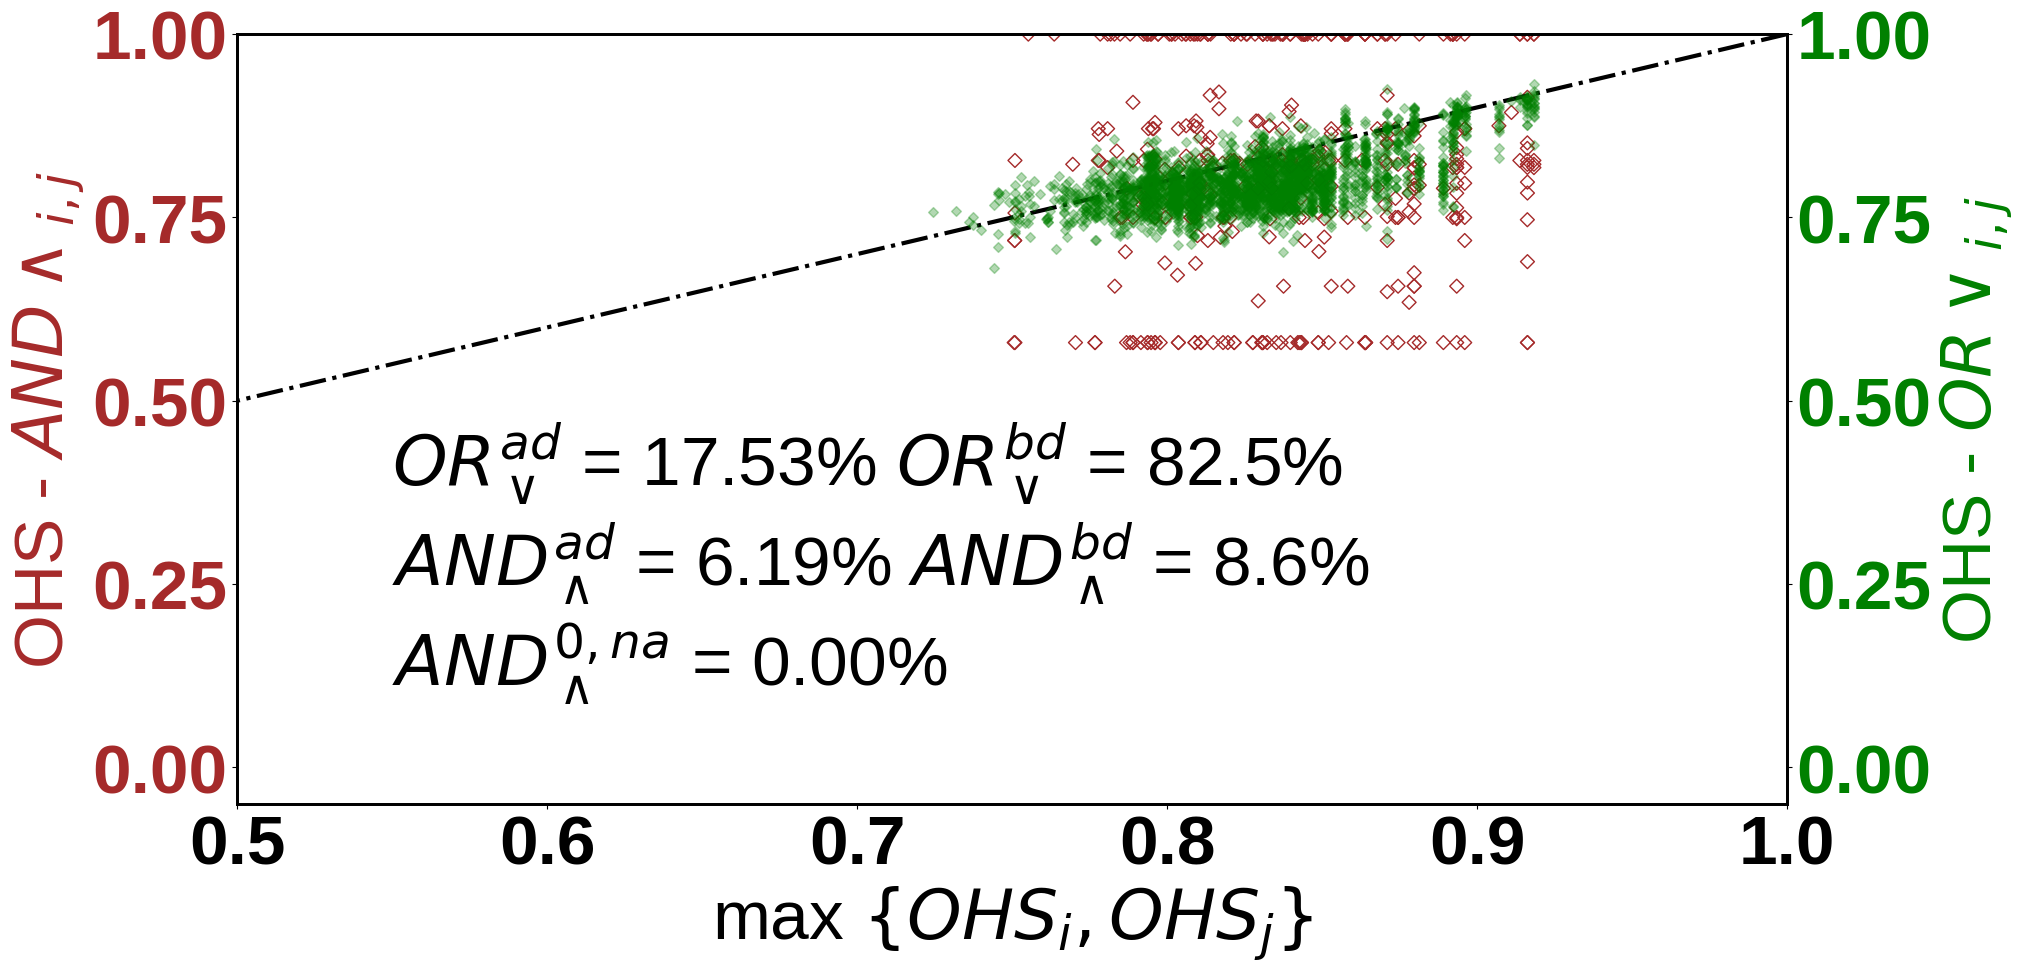

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
figname="../figures/CA1_"+quant+"_maxMvANDOR.pdf"

## Diagonal Line#
ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) 

clr='brown'
ax.set_xlim([xqmin,xqmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(df_AND.query('LOC=="CA1"')["Rmax_"+quant].values,df_AND.query('LOC=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)

ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(df_OR.query('LOC=="CA1"')["Rmax_"+quant].values,df_OR.query('LOC=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)

ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 

fracC_ad_or=df_OR.query('LOC=="CA1" and '+quant+'>Rmax_'+quant).shape[0]/df_OR.query('LOC=="CA1"').shape[0]
fracC_bd_or=df_OR.query('LOC=="CA1" and '+quant+'<Rmax_'+quant).shape[0]/df_OR.query('LOC=="CA1"').shape[0]

fracC_ad_and=df_AND.query('LOC=="CA1" and '+quant+'>Rmax_'+quant).shape[0]/df_AND.query('LOC=="CA1"').shape[0]
fracC_bd_and=df_AND.query('LOC=="CA1" and 0<'+quant+'<Rmax_'+quant).shape[0]/df_AND.query('LOC=="CA1"').shape[0]
fracC_zero=df_AND.query('LOC=="CA1" and '+quant+'==0').shape[0]/df_AND.query('LOC=="CA1"').shape[0]

ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

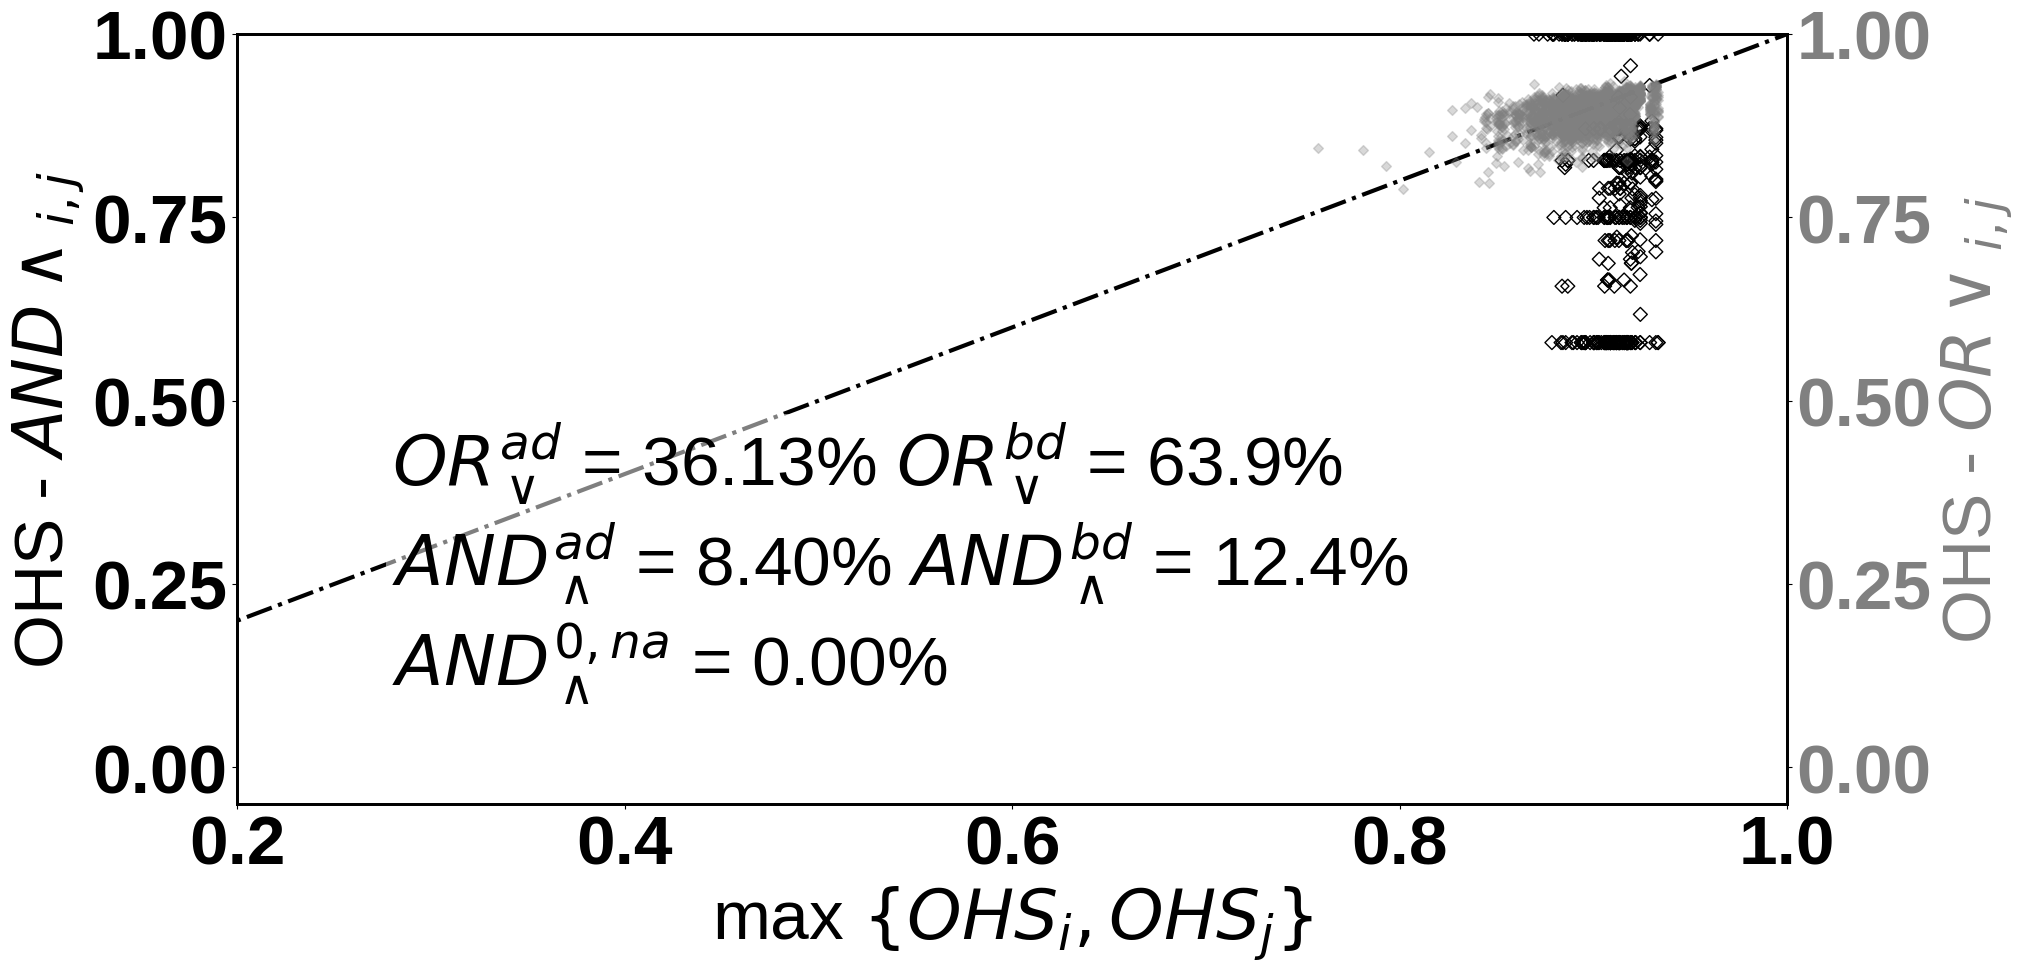

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
figname="../figures/CA1_"+quant+"_maxMvANDOR_poss.pdf"

## Diagonal Line#
ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) 

clr='k'
ax.set_xlim([Pxqmin,Pxqmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(df_possAND.query('LOC=="CA1"')["Rmax_"+quant].values,df_possAND.query('LOC=="CA1"')[quant].values,
         label='possANDed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)


ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='grey'
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax_twin.scatter(df_possOR.query('LOC=="CA1"')["Rmax_"+quant].values,df_possOR.query('LOC=="CA1"')[quant].values,label='possORed CA1 Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)


ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

# Activate if plotting for all recording 

fracC_ad_or=df_possOR.query('LOC=="CA1" and '+quant+'>Rmax_'+quant).shape[0]/df_possOR.query('LOC=="CA1"').shape[0]
fracC_bd_or=df_possOR.query('LOC=="CA1" and '+quant+'<Rmax_'+quant).shape[0]/df_possOR.query('LOC=="CA1"').shape[0]

fracC_ad_and=df_possAND.query('LOC=="CA1" and '+quant+'>Rmax_'+quant).shape[0]/df_possAND.query('LOC=="CA1"').shape[0]
fracC_bd_and=df_possAND.query('LOC=="CA1" and 0<'+quant+'<Rmax_'+quant).shape[0]/df_possAND.query('LOC=="CA1"').shape[0]
fracC_zero=df_possAND.query('LOC=="CA1" and '+quant+'==0').shape[0]/df_possAND.query('LOC=="CA1"').shape[0]


ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [127]:

ax.scatter(df_possAND.query('LOC=="CA1"')["Rmax_"+quant].values,df_possAND.query('LOC=="CA1"')[quant].values,
         label='possANDed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)


ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='grey'
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax_twin.scatter(df_possOR.query('LOC=="CA1"')["Rmax_"+quant].values,df_possOR.query('LOC=="CA1"')[quant].values,label='possORed CA1 Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)

In [128]:
filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-9]+'.csv'

with open(filepath_plotdata, 'w', newline='') as csvfile:
    fieldnames = ["Rmax_"+quant,quant+'-AND_CA1', 
                  "Rmax_"+quant,quant+'-OR_CA1', 
                   "PossRmax_"+quant,quant+'-PossAND_CA1', 
                   "PossRmax_"+quant,quant+'-PossOR_CA1']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(
        {
            "Rmax_"+quant:a,quant+'-AND_CA1':b, 
            "Rmax_"+quant:c,quant+'-OR_CA1':d, 
            "PossRmax_"+quant:e,quant+'-PossAND_CA1':f, 
            "PossRmax_"+quant:g,quant+'-PossOR_CA1':h
        } for a,b,c,d,e,f,g,h in zip(
            df_AND.query('LOC=="CA1"')["Rmax_"+quant].values,
            df_AND.query('LOC=="CA1"')[quant].values,
            df_OR.query('LOC=="CA1"')["Rmax_"+quant].values,
            df_OR.query('LOC=="CA1"')[quant].values,
            df_possAND.query('LOC=="CA1"')["Rmax_"+quant].values,
            df_possAND.query('LOC=="CA1"')[quant].values,
            df_possOR.query('LOC=="CA1"')["Rmax_"+quant].values,
            df_possOR.query('LOC=="CA1"')[quant].values
            )
    )

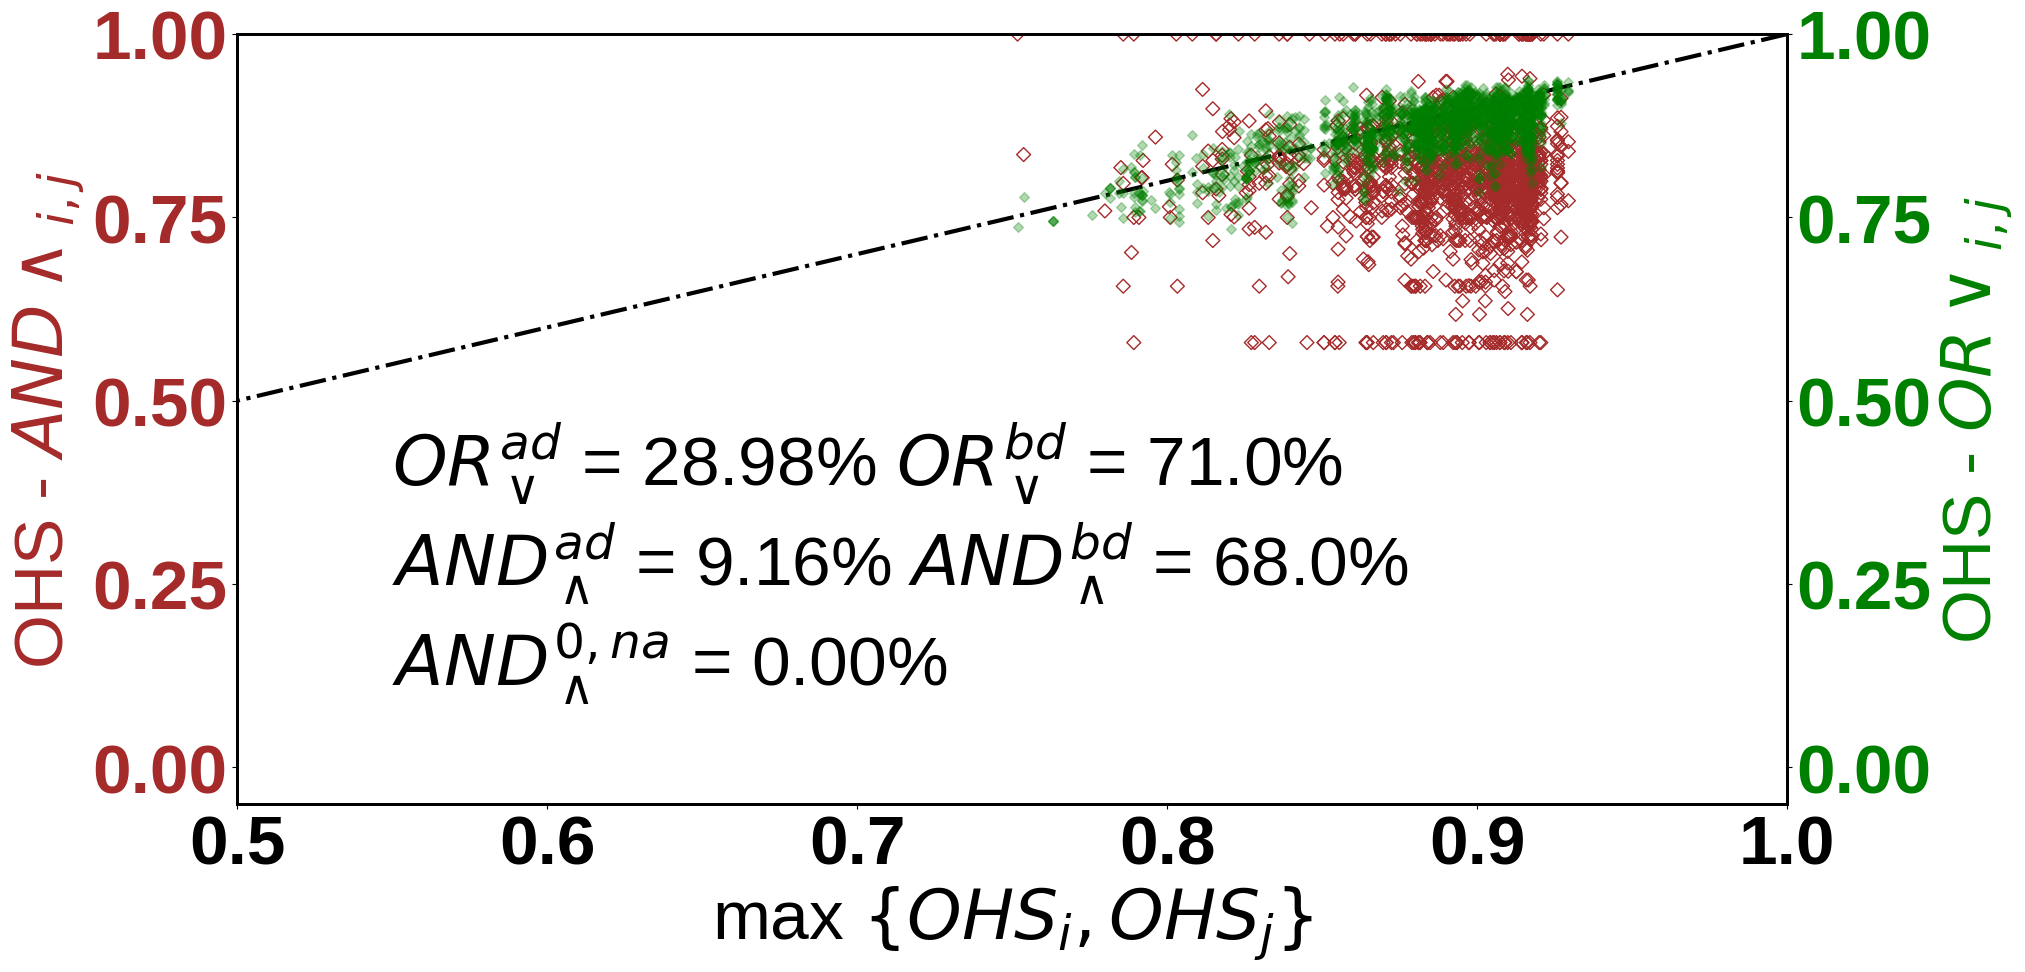

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
figname="../figures/SUB_"+quant+"_maxMvANDOR.pdf"

## Diagonal Line#
ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) 

clr='brown'
ax.set_xlim([xqmin,xqmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(df_AND.query('LOC=="SUB"')["Rmax_"+quant].values,df_AND.query('LOC=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)

ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(df_OR.query('LOC=="SUB"')["Rmax_"+quant].values,df_OR.query('LOC=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)

ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 

fracS_ad_or=df_OR.query('LOC=="SUB" and '+quant+'>Rmax_'+quant).shape[0]/df_OR.query('LOC=="SUB"').shape[0]
fracS_bd_or=df_OR.query('LOC=="SUB" and '+quant+'<Rmax_'+quant).shape[0]/df_OR.query('LOC=="SUB"').shape[0]

fracS_ad_and=df_AND.query('LOC=="SUB" and '+quant+'>Rmax_'+quant).shape[0]/df_AND.query('LOC=="SUB"').shape[0]
fracS_bd_and=df_AND.query('LOC=="SUB" and 0<'+quant+'<Rmax_'+quant).shape[0]/df_AND.query('LOC=="SUB"').shape[0]
fracS_zero=df_AND.query('LOC=="SUB" and '+quant+'==0').shape[0]/df_AND.query('LOC=="SUB"').shape[0]


ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracS_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracS_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracS_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracS_bd_and)+'\n'+
        r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracS_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

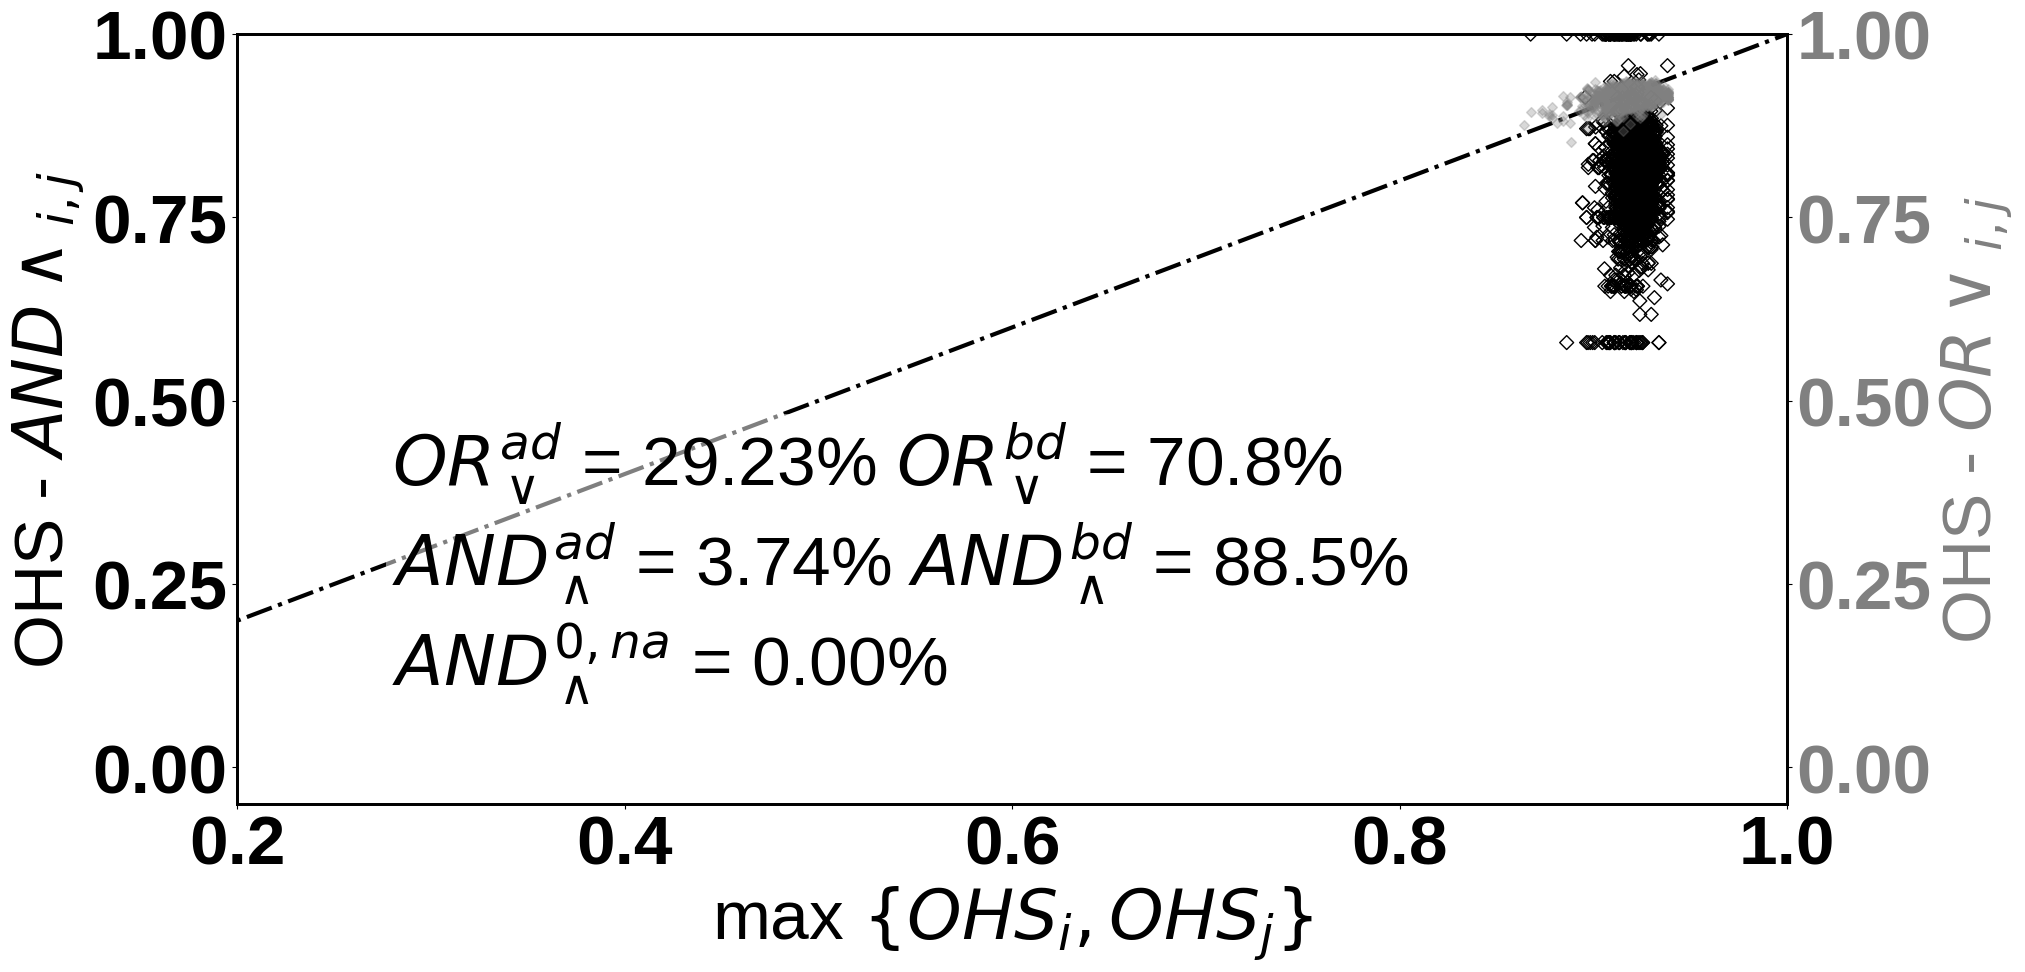

In [130]:
fig, ax = plt.subplots(figsize=(20,10))
figname="../figures/SUB_"+quant+"_maxMvANDOR_poss.pdf"


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='k'
ax.set_xlim([Pxqmin,Pxqmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(df_possAND.query('LOC=="SUB"')["Rmax_"+quant].values,df_possAND.query('LOC=="SUB"')[quant].values,
         label='possANDed SUB Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)


ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='grey'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax_twin.scatter(df_possOR.query('LOC=="SUB"')["Rmax_"+quant].values,df_possOR.query('LOC=="SUB"')[quant].values,label='possORed SUB Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)


ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 

fracS_ad_or=df_possOR.query('LOC=="SUB" and '+quant+'>Rmax_'+quant).shape[0]/df_possOR.query('LOC=="SUB"').shape[0]
fracS_bd_or=df_possOR.query('LOC=="SUB" and '+quant+'<Rmax_'+quant).shape[0]/df_possOR.query('LOC=="SUB"').shape[0]

fracS_ad_and=df_possAND.query('LOC=="SUB" and '+quant+'>Rmax_'+quant).shape[0]/df_possAND.query('LOC=="SUB"').shape[0]
fracS_bd_and=df_possAND.query('LOC=="SUB" and 0<'+quant+'<Rmax_'+quant).shape[0]/df_possAND.query('LOC=="SUB"').shape[0]
fracS_zero=df_possAND.query('LOC=="SUB" and '+quant+'==0').shape[0]/df_possAND.query('LOC=="SUB"').shape[0]


ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracS_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracS_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracS_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracS_bd_and)+'\n'+
        r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracS_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [131]:
filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-9]+'.csv'

with open(filepath_plotdata, 'w', newline='') as csvfile:
    fieldnames = ["Rmax_"+quant,quant+'-AND_SUB', 
                  "Rmax_"+quant,quant+'-OR_SUB', 
                   "PossRmax_"+quant,quant+'-PossAND_SUB', 
                   "PossRmax_"+quant,quant+'-PossOR_SUB']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(
        {
            "Rmax_"+quant:a,quant+'-AND_SUB':b, 
            "Rmax_"+quant:c,quant+'-OR_SUB':d, 
            "PossRmax_"+quant:e,quant+'-PossAND_SUB':f, 
            "PossRmax_"+quant:g,quant+'-PossOR_SUB':h
        } for a,b,c,d,e,f,g,h in zip(
            df_AND.query('LOC=="SUB"')["Rmax_"+quant].values,
            df_AND.query('LOC=="SUB"')[quant].values,
            df_OR.query('LOC=="SUB"')["Rmax_"+quant].values,
            df_OR.query('LOC=="SUB"')[quant].values,
            df_possAND.query('LOC=="SUB"')["Rmax_"+quant].values,
            df_possAND.query('LOC=="SUB"')[quant].values,
            df_possOR.query('LOC=="SUB"')["Rmax_"+quant].values,
            df_possOR.query('LOC=="SUB"')[quant].values
            )
    )

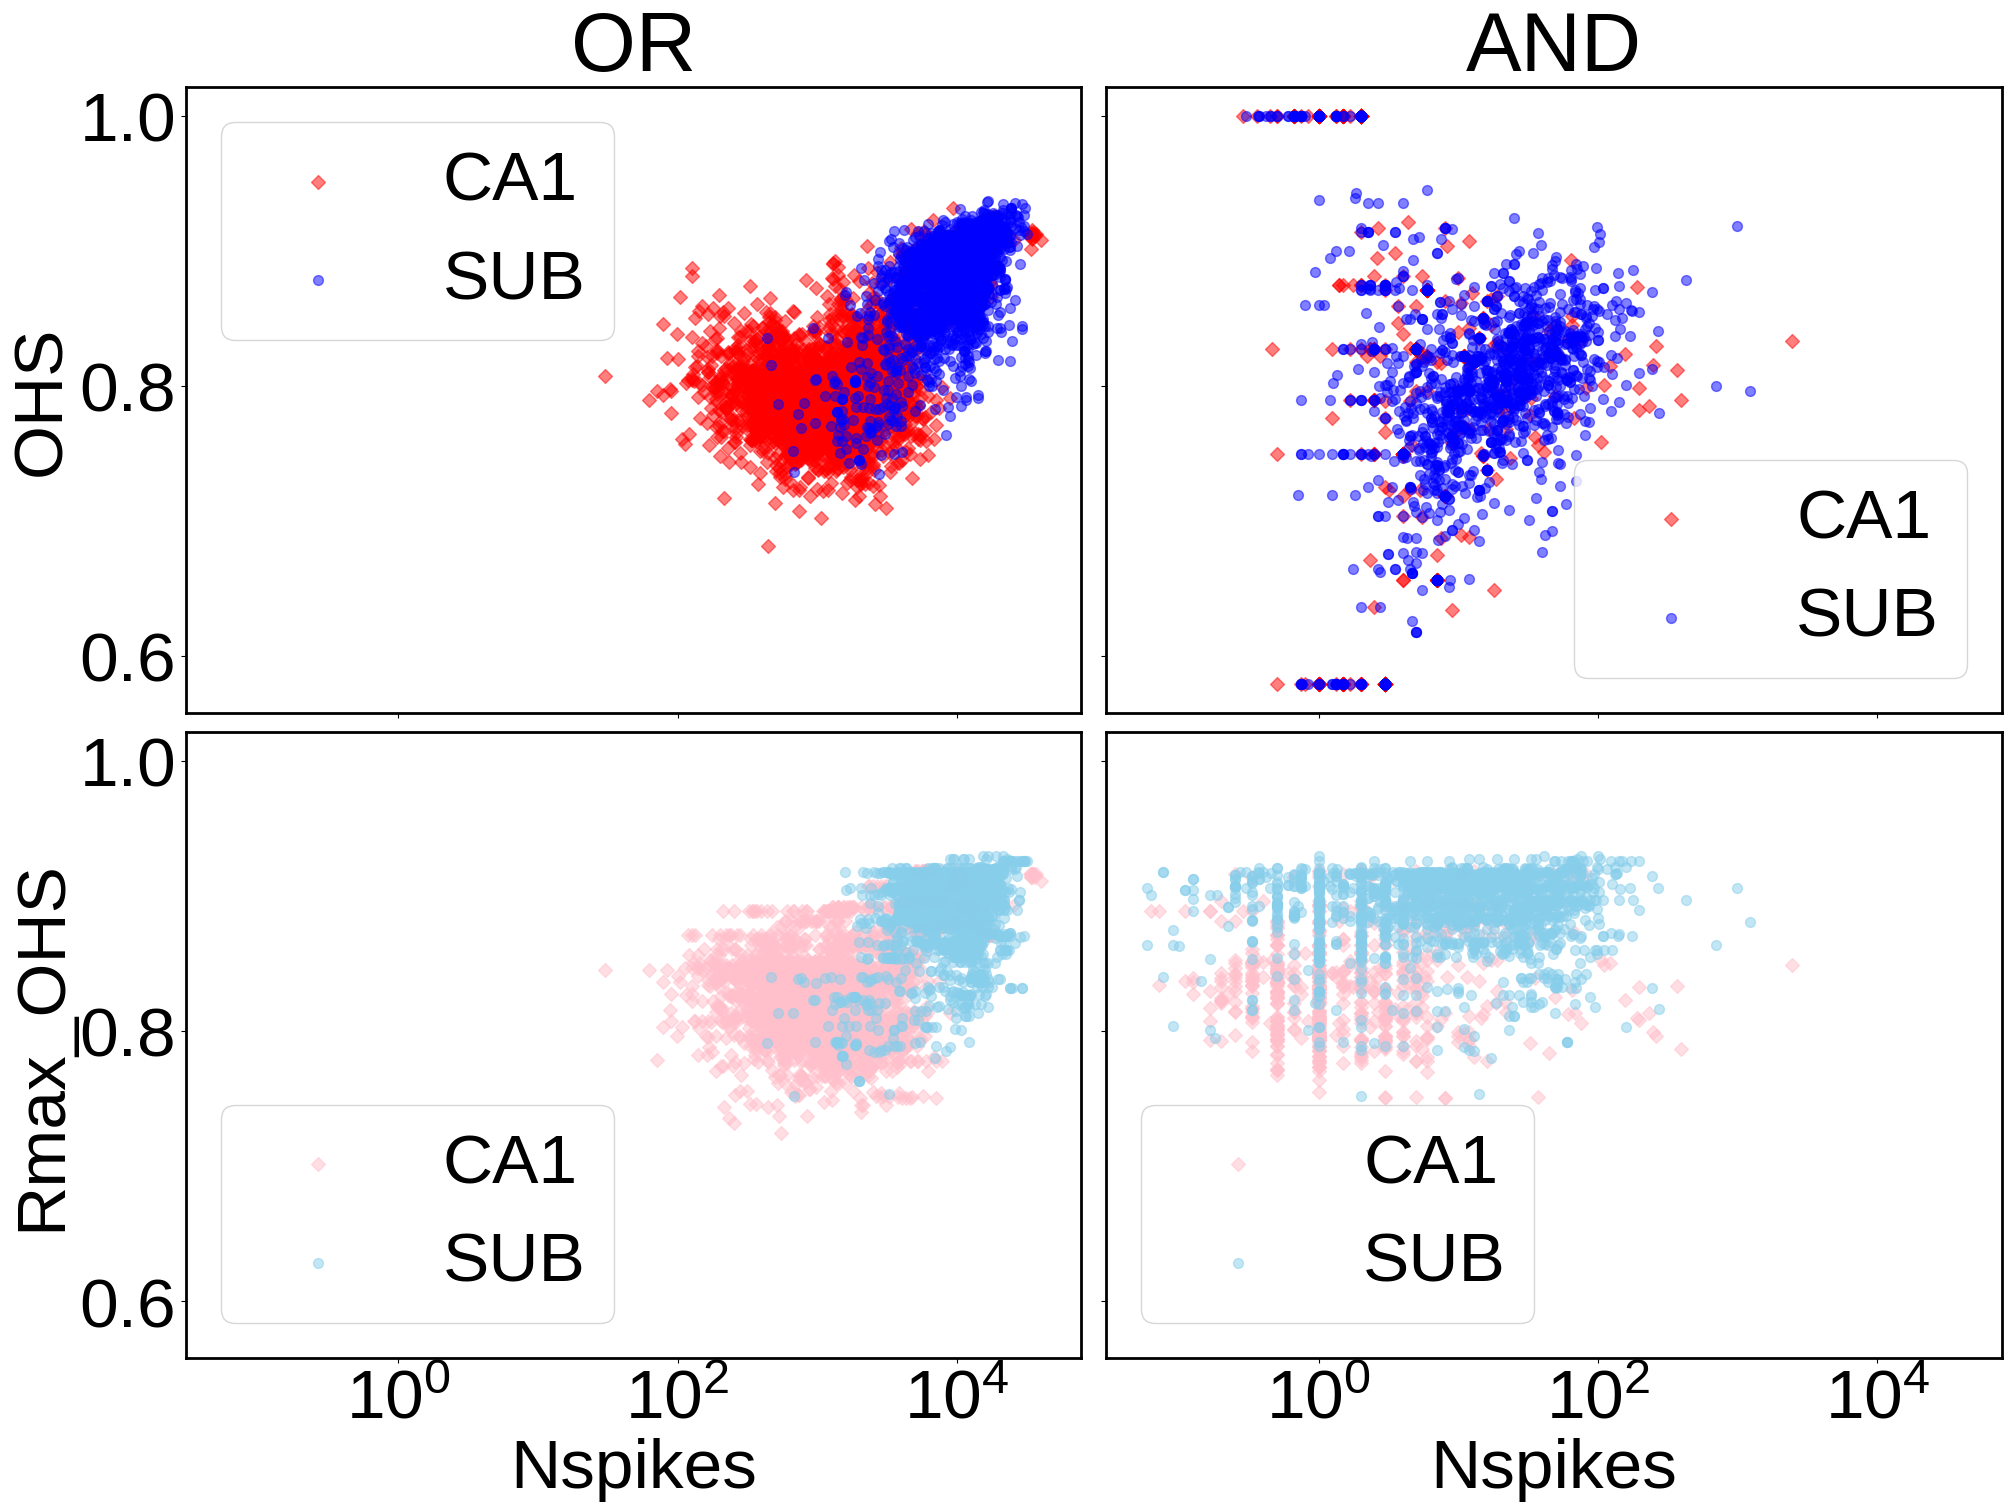

In [132]:
figname="../figures/"+quant+"_LoPvNspike.pdf"

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

df_OR.query('LOC=="CA1"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
df_OR.query('LOC=="SUB"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

df_OR.query('LOC=="CA1"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
df_OR.query('LOC=="SUB"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
#ax3.set_title(r'R$_{max}$-OR')


df_AND.query('LOC=="CA1"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
df_AND.query('LOC=="SUB"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')
df_AND.query('LOC=="CA1"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
df_AND.query('LOC=="SUB"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
#ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

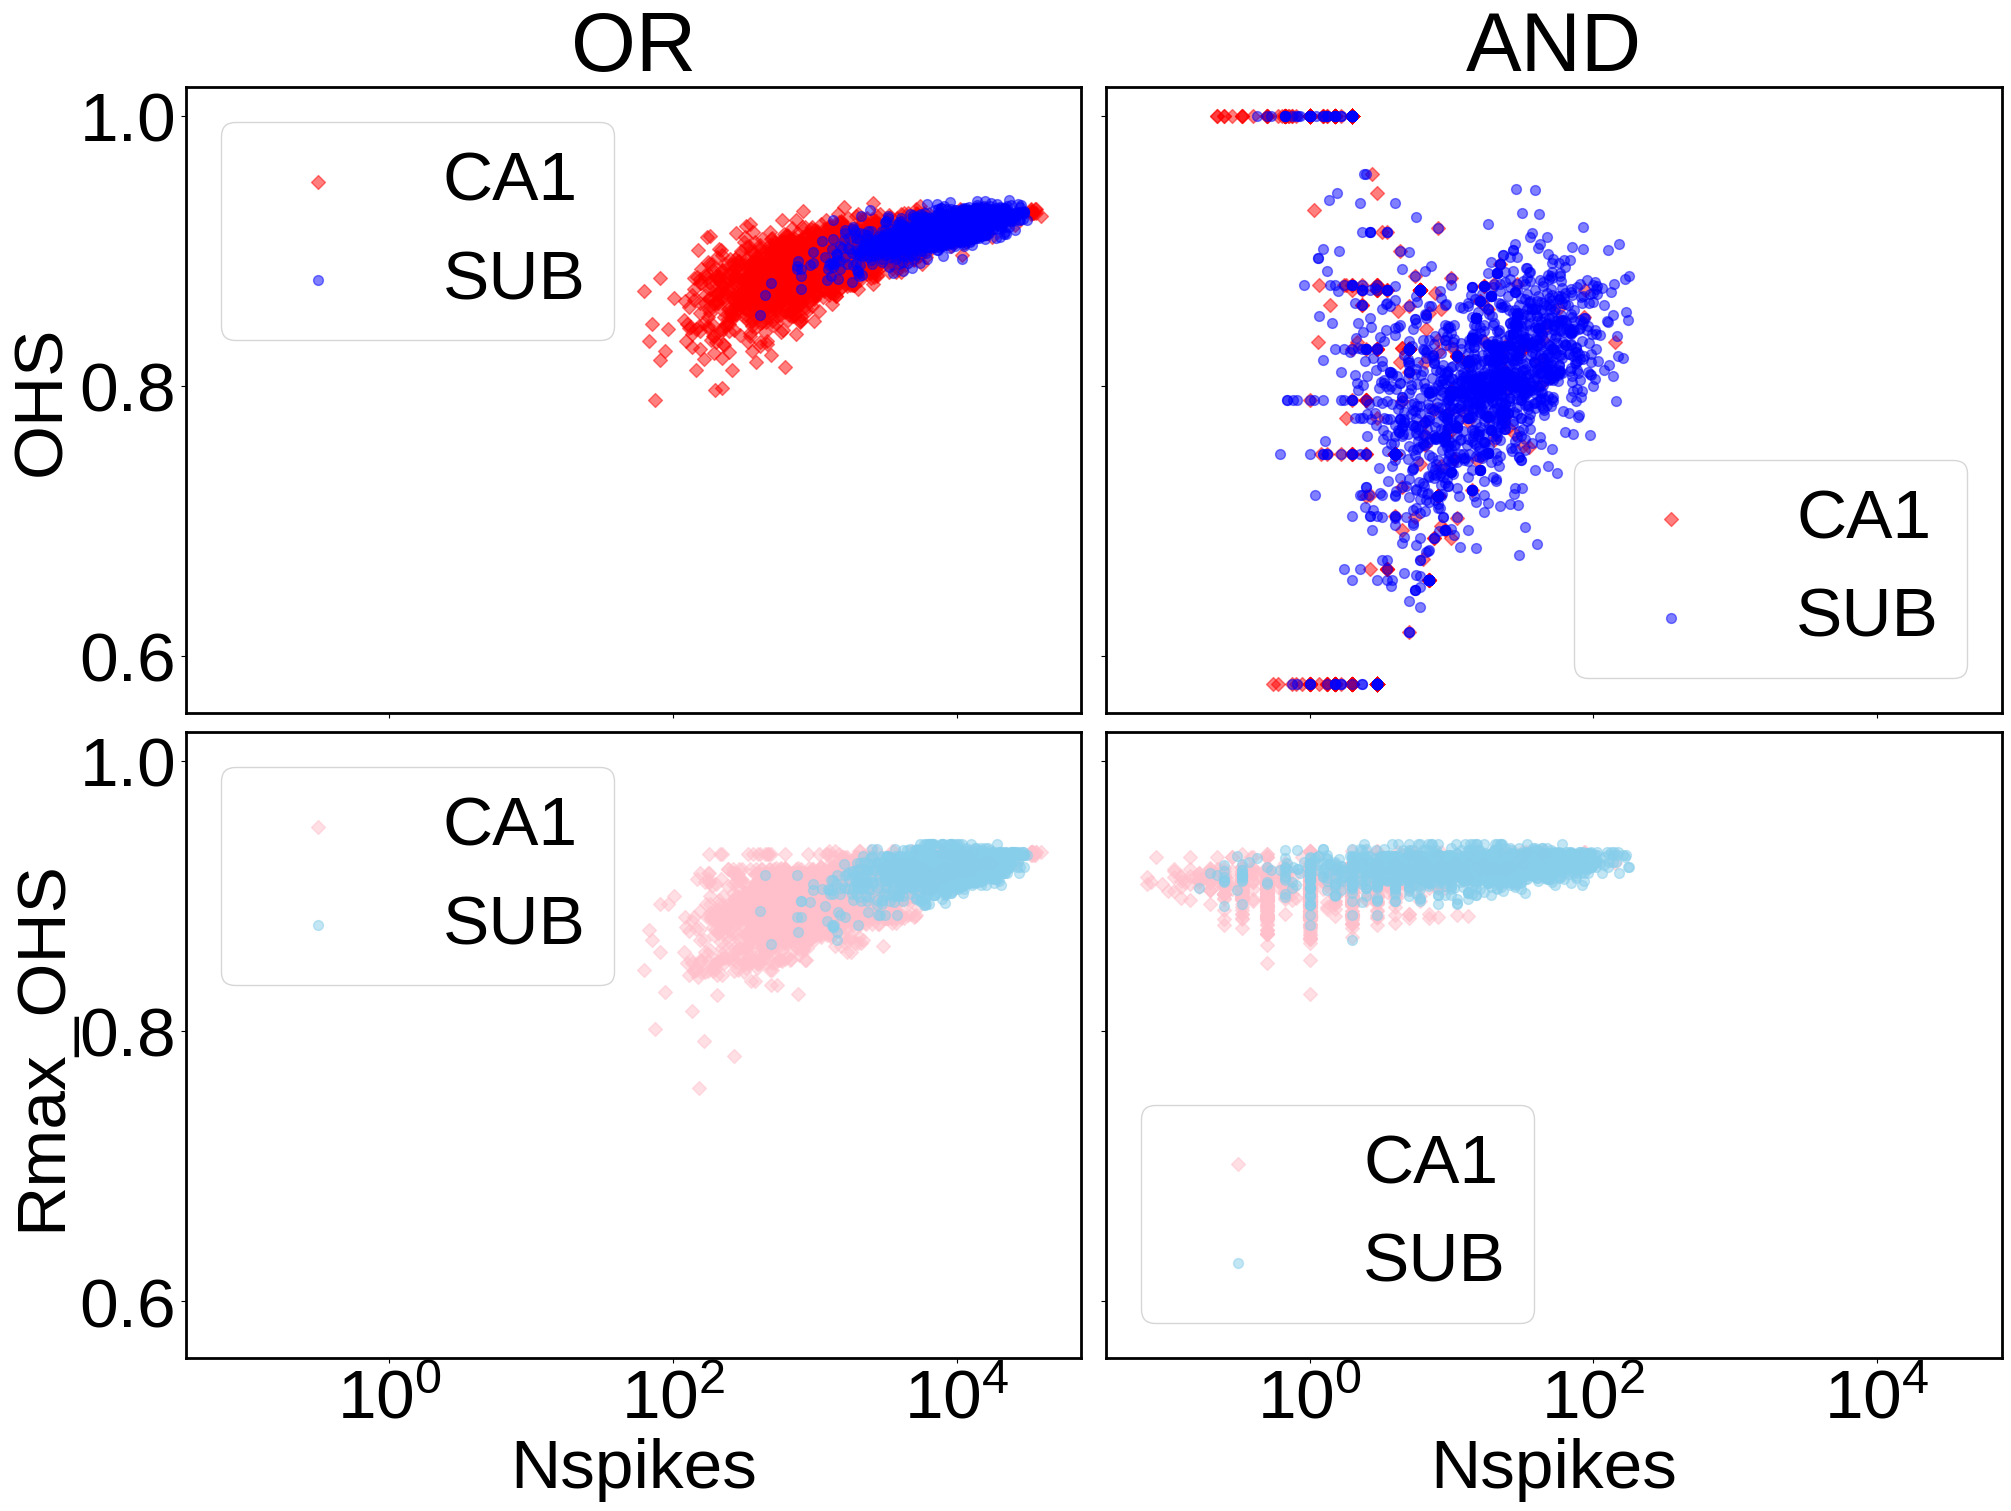

In [133]:
figname="../figures/"+quant+"_LoPvNspike_poss.pdf"

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

df_possOR.query('LOC=="CA1"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
df_possOR.query('LOC=="SUB"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

df_possOR.query('LOC=="CA1"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
df_possOR.query('LOC=="SUB"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
#ax3.set_title(r'R$_{max}$-OR')


df_possAND.query('LOC=="CA1"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
df_possAND.query('LOC=="SUB"').plot(y=quant,x='Nspikes',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')
df_possAND.query('LOC=="CA1"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
df_possAND.query('LOC=="SUB"').plot(y="Rmax_"+quant,x='Nspikes',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
#ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [134]:
filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-9]+'.csv'

with open(filepath_plotdata, 'w', newline='') as csvfile:
    fieldnames = [ "Nspikes",quant+'-OR_CA1',"Rmax_"+quant+'-OR_CA1',
                    "Nspikes",quant+'-OR_SUB',"Rmax_"+quant+'-OR_SUB',
                    "Nspikes",quant+'-AND_CA1',"Rmax_"+quant+'-AND_CA1',
                    "Nspikes",quant+'-AND_SUB', "Rmax_"+quant+'-AND_SUB',
            
                    "Poss_Nspikes",quant+'-PossOR_CA1',"Rmax_"+quant+'-PossOR_CA1',
                    "Poss_Nspikes",quant+'-PossOR_SUB',"Rmax_"+quant+'-PossOR_SUB',
                    "Poss_Nspikes",quant+'-PossAND_CA1',"Rmax_"+quant+'-PossAND_CA1',
                    "Poss_Nspikes",quant+'-PossAND_SUB', "Rmax_"+quant+'-PossAND_SUB',
                  ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(
        {
            "Nspikes":a[0],quant+'-OR_CA1':a[1],"Rmax_"+quant+'-OR_CA1':a[2],
            "Nspikes":b[0],quant+'-OR_SUB':b[1],"Rmax_"+quant+'-OR_SUB':b[2],
            "Nspikes":c[0],quant+'-AND_CA1':c[1],"Rmax_"+quant+'-AND_CA1':c[2],
            "Nspikes":d[0],quant+'-AND_SUB':d[1], "Rmax_"+quant+'-AND_SUB':d[2],
    
            "Poss_Nspikes":e[0],quant+'-PossOR_CA1':e[1],"Rmax_"+quant+'-PossOR_CA1':e[2],
            "Poss_Nspikes":f[0],quant+'-PossOR_SUB':f[1],"Rmax_"+quant+'-PossOR_SUB':f[2],
            "Poss_Nspikes":g[0],quant+'-PossAND_CA1':g[1],"Rmax_"+quant+'-PossAND_CA1':g[2],
            "Poss_Nspikes":h[0],quant+'-PossAND_SUB':h[1], "Rmax_"+quant+'-PossAND_SUB':h[2],

        } for a,b,c,d,e,f,g,h in zip(
            df_OR.query('LOC=="CA1"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_OR.query('LOC=="SUB"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_AND.query('LOC=="CA1"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_AND.query('LOC=="SUB"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_possOR.query('LOC=="CA1"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_possOR.query('LOC=="SUB"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_possAND.query('LOC=="CA1"')[['Nspikes',quant,"Rmax_"+quant]].values,
            df_possAND.query('LOC=="SUB"')[['Nspikes',quant,"Rmax_"+quant]].values
            )
    )

# Code for Recording Based Figures [Not Currently Included in MS]


## MSR -- Individual Figures of the subplot for all recordings combined

In [37]:
quant='MSR'

In [8]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
         'poss'+quant:df_possOR.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
         'poss'+quant:df_possAND.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

In [38]:
#qmin=0.245;qmax=0.305; #For MSR
qmin=0.22;qmax=0.31; #For MSR

#MSR
#xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.01;


## Single recording
# qmin=0.245;qmax=0.305; #For MSR

# #MSR
# xqmax=0.31;xqmin=0.25;
# yqmax=0.32;yqmin=-0.02;



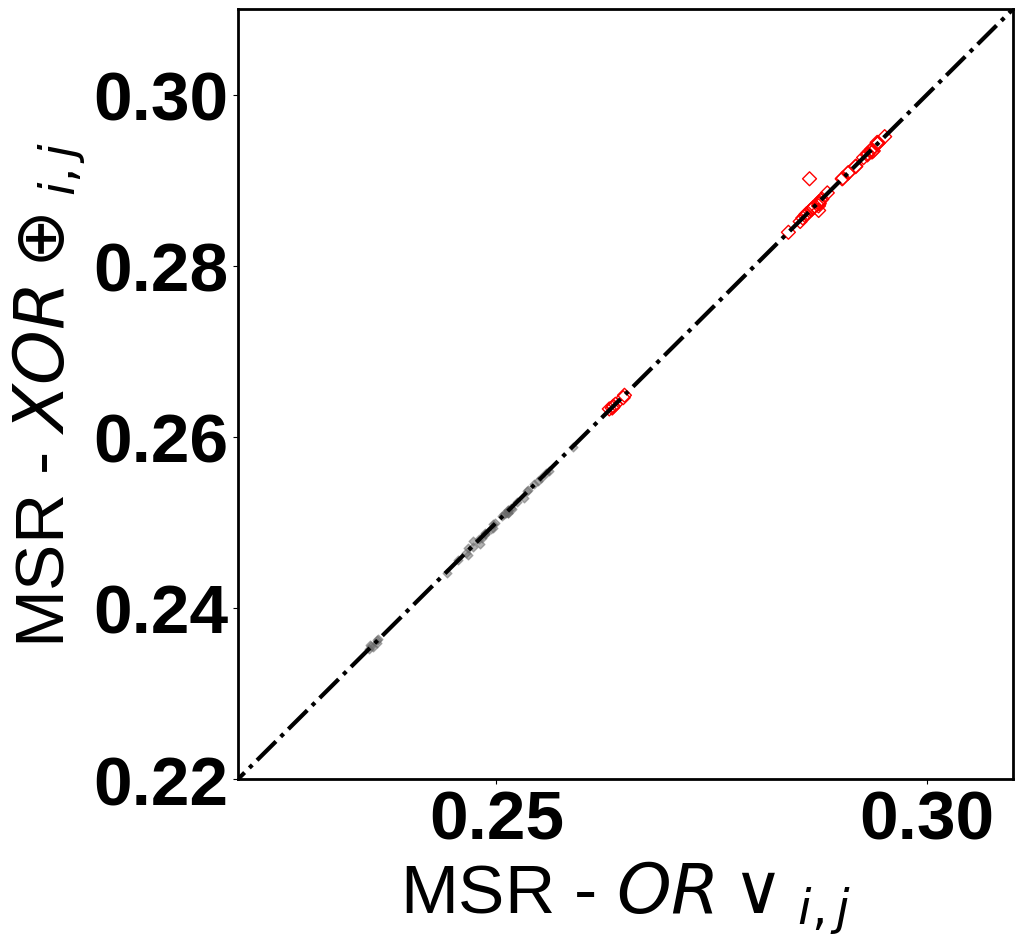

In [39]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/CA1_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="CA1"')[quant].values,df_possXOR.query('U_LOC=="CA1"')[quant].values, label='poss CA1 Neurons',  marker='D',alpha=0.5,color='dimgrey',s=mss-30)


ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

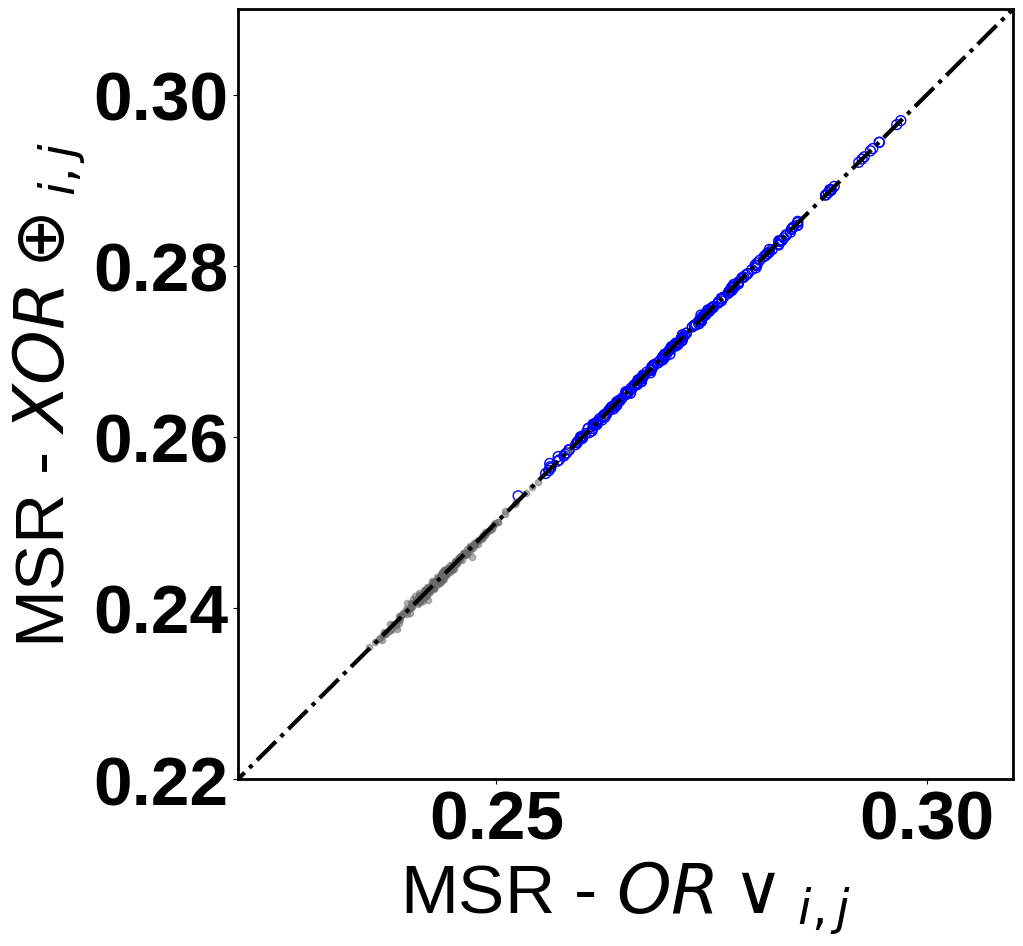

In [40]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/SUB_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="SUB"')[quant].values,df_possXOR.query('U_LOC=="SUB"')[quant].values, label='poss SUB Neurons',  marker='o', alpha=0.5,color='dimgrey',s=mss-30)



ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [12]:
#qmin=0.245;qmax=0.305; #For MSR
qmin=0.24;qmax=0.31; #For MSR

#MSR
#xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.01;


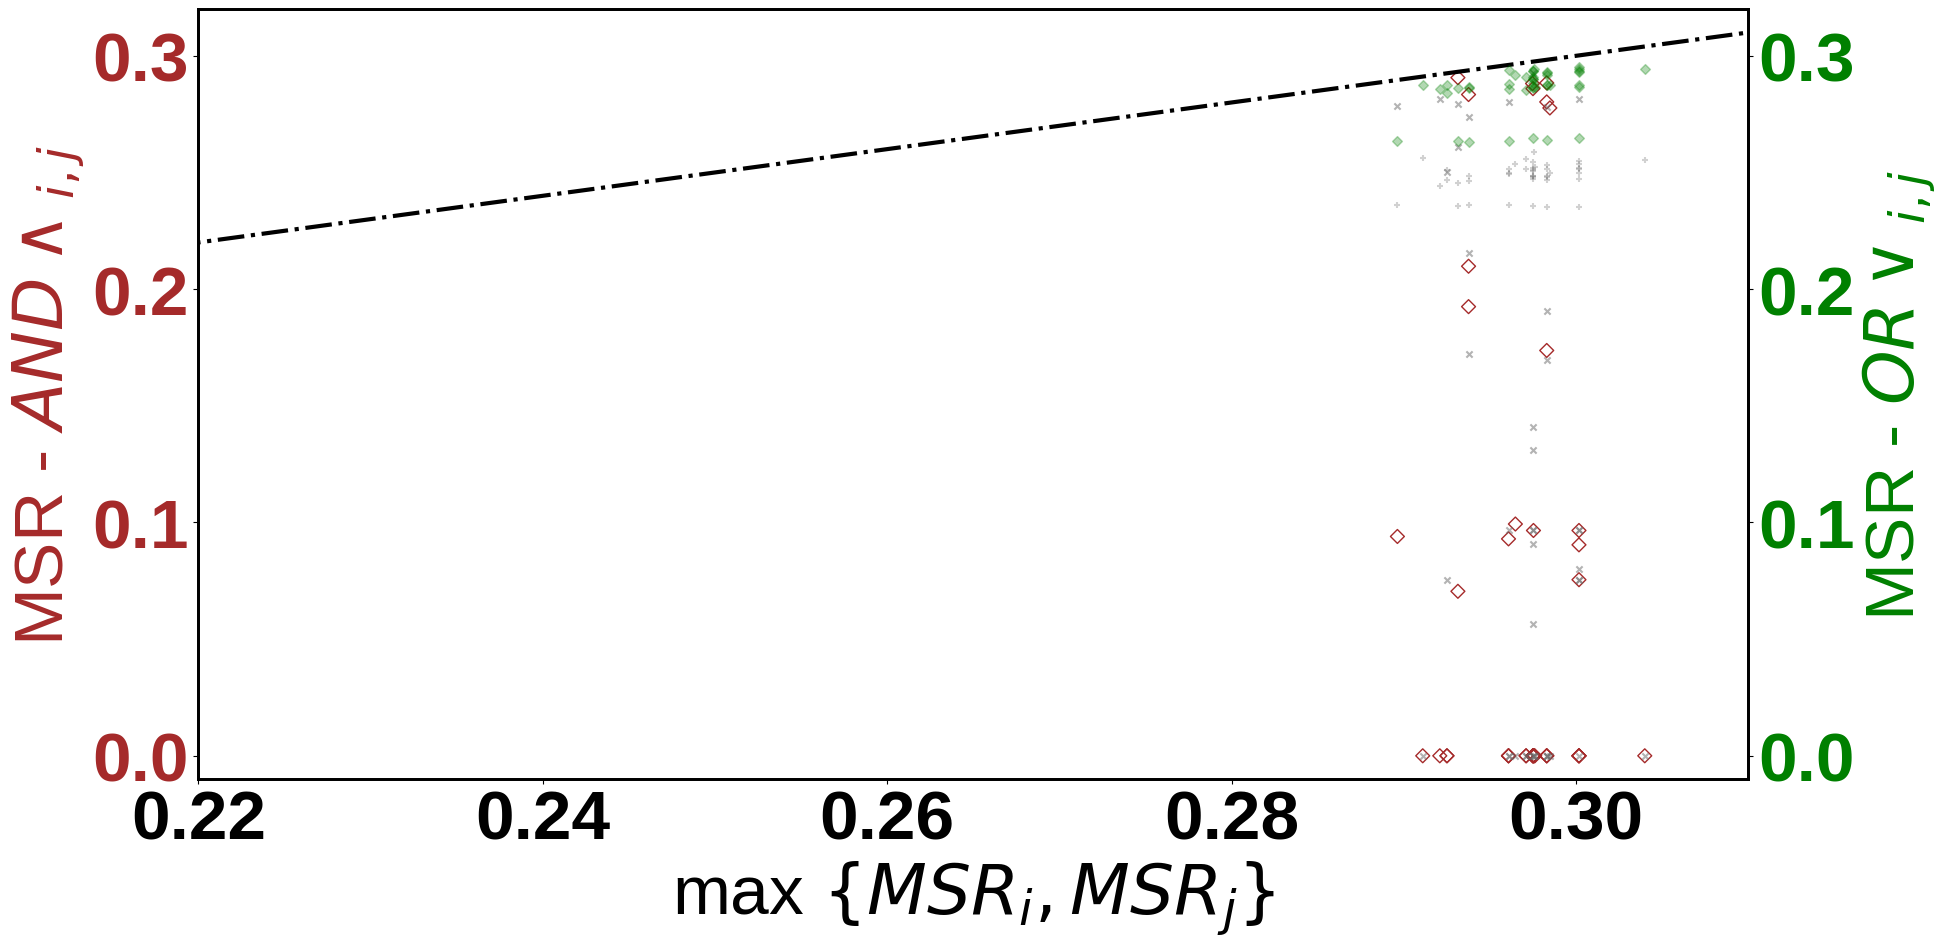

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_MSR_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30,alpha=0.5)


ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)


ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 

fracC_ad_or=list_of_OR.query('loc=="CA1" and MSR>R_MSR_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and MSR<R_MSR_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<MSR<R_MSR_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and MSR==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


# ax.text(0.1, 0.5,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

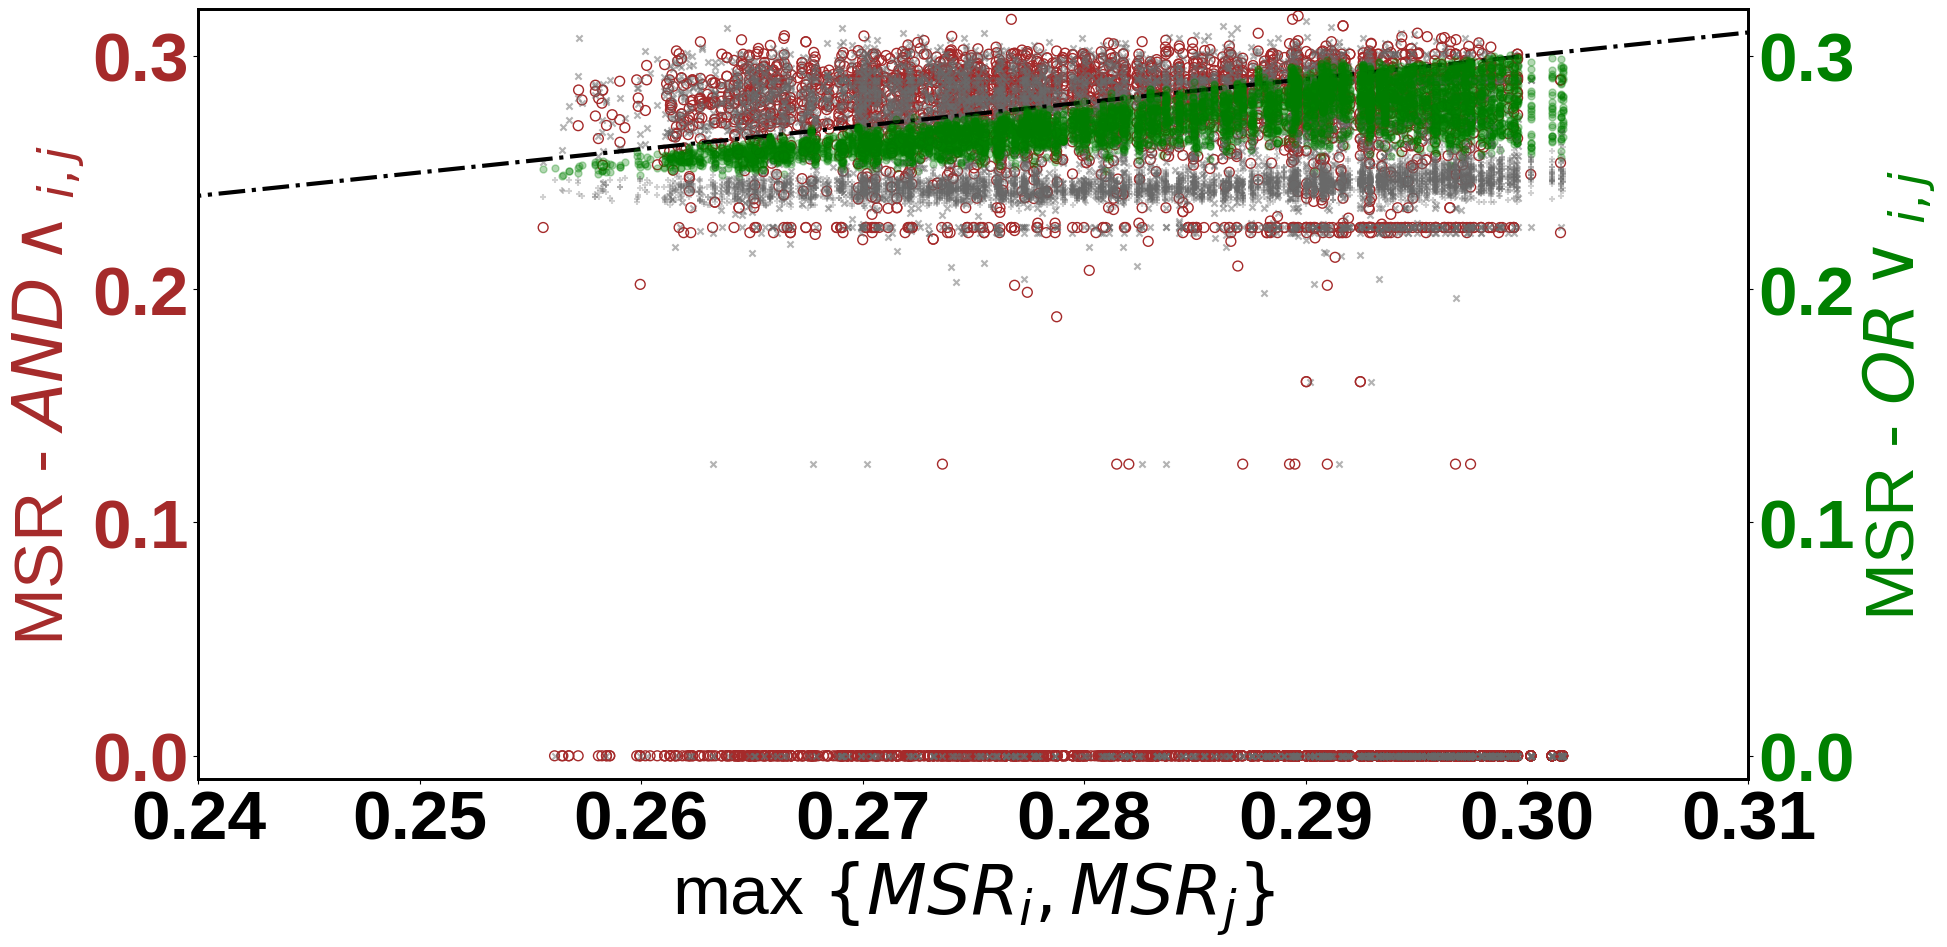

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_MSR_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)

ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30,alpha=0.5)




ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)




ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and MSR>R_MSR_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and MSR<R_MSR_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<MSR<R_MSR_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and MSR==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


# ax.text(0.1, 0.5,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

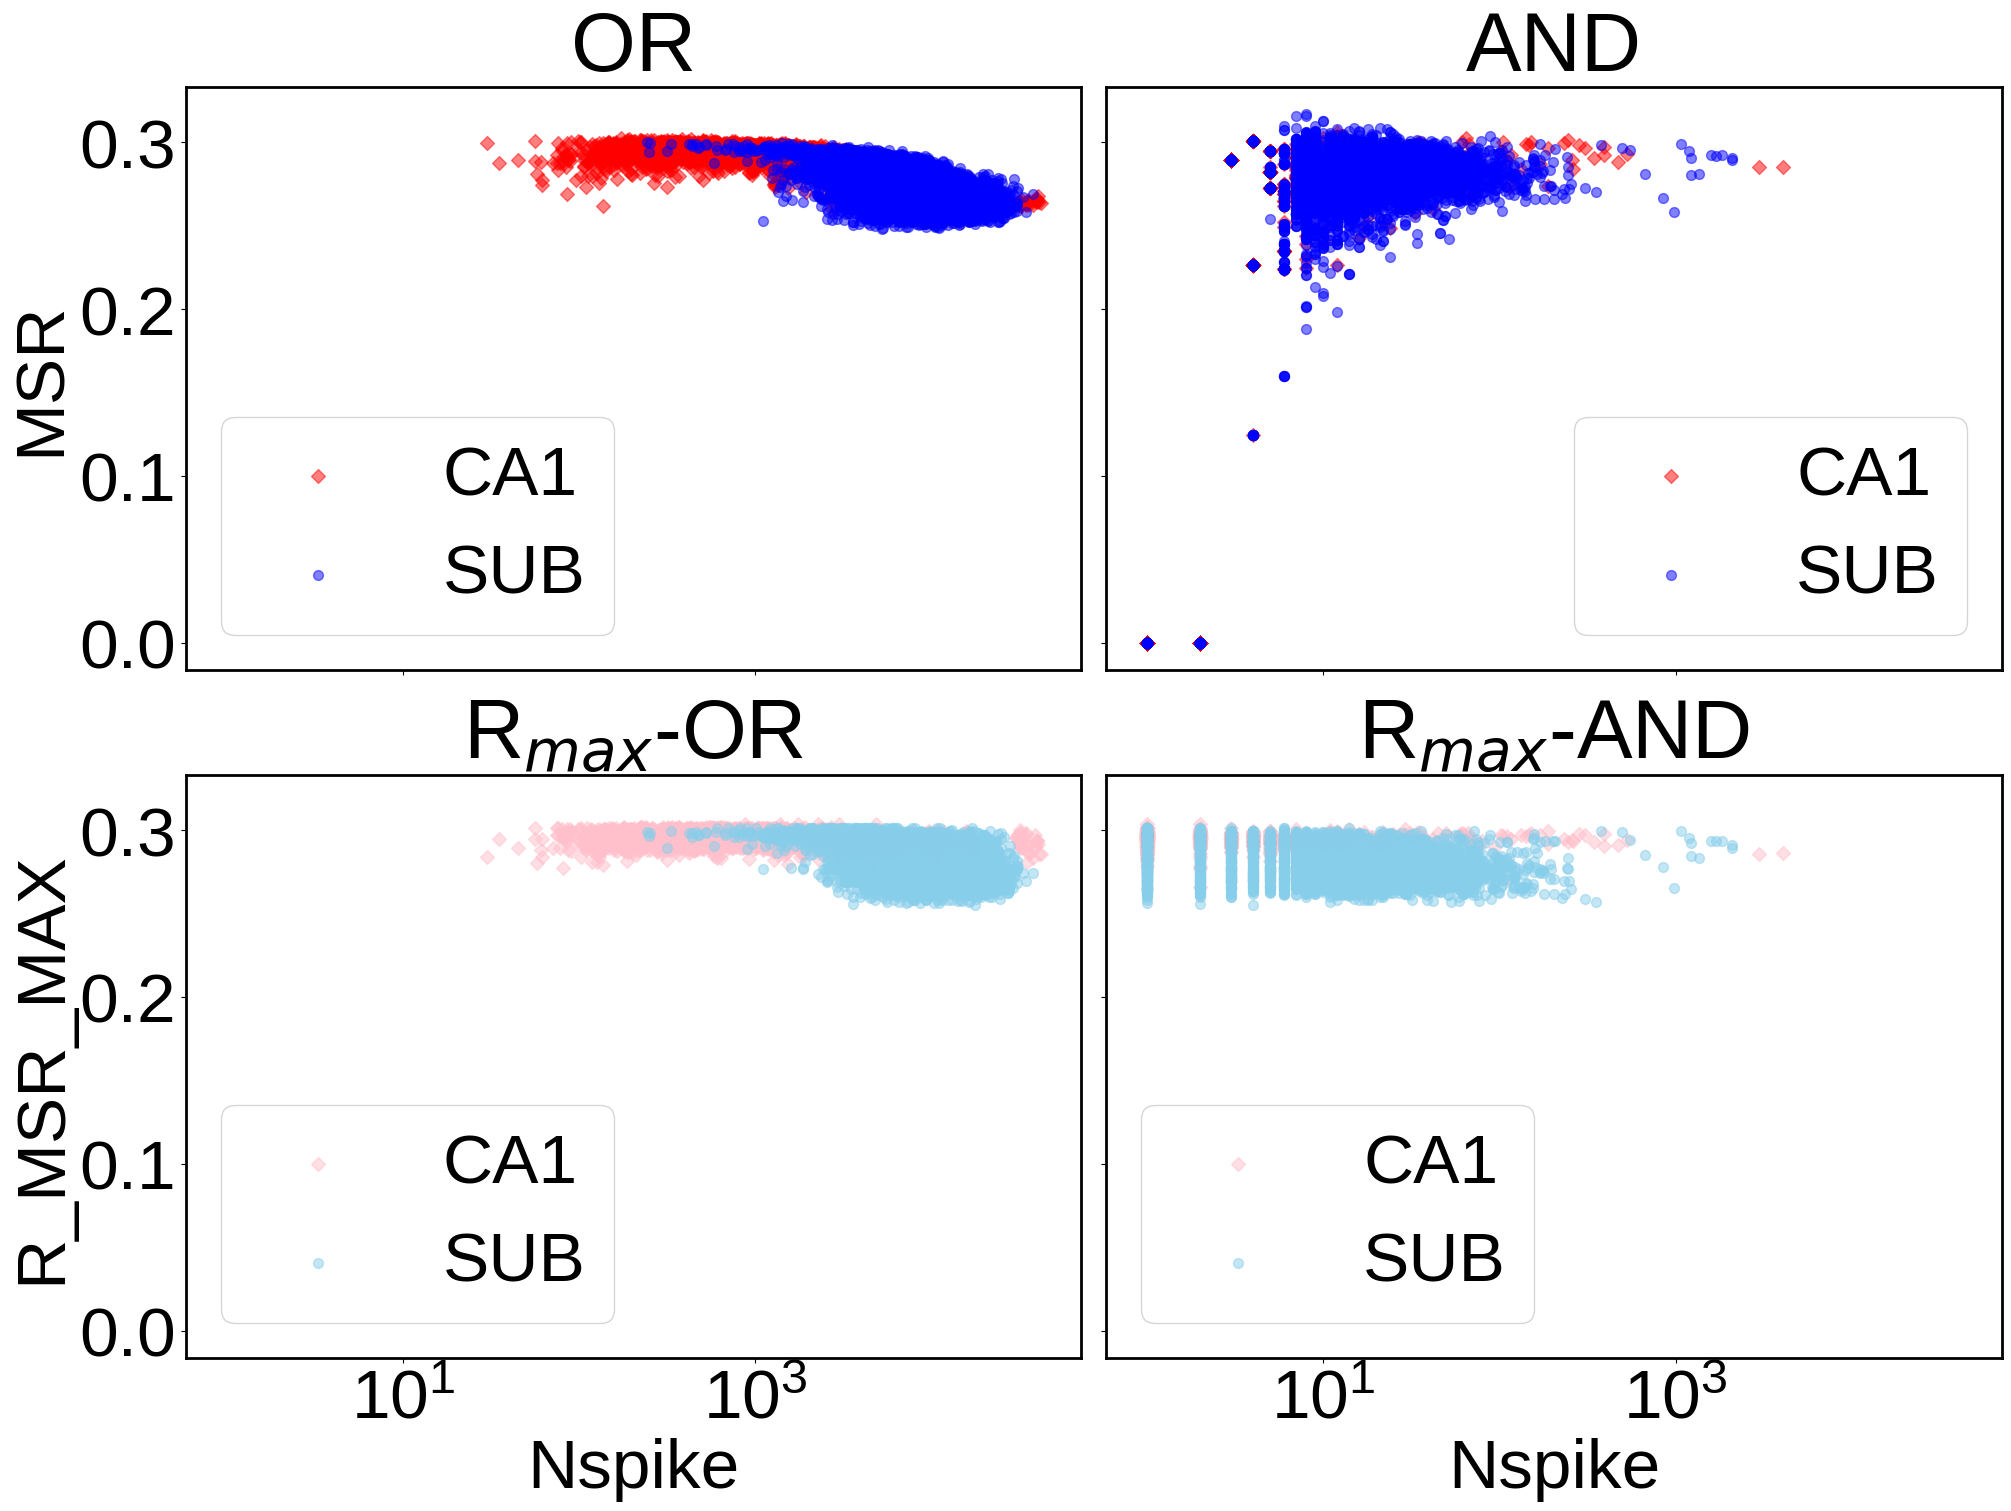

In [15]:
figname='../figures/MSR_LoPvNspike.pdf'

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

# OHK -- Individual Figures of the subplot for all recordings combined

In [16]:
quant='OHK'

#For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=-0.05;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [17]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
          'poss'+quant:df_possOR.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
         'poss'+quant:df_possAND.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)



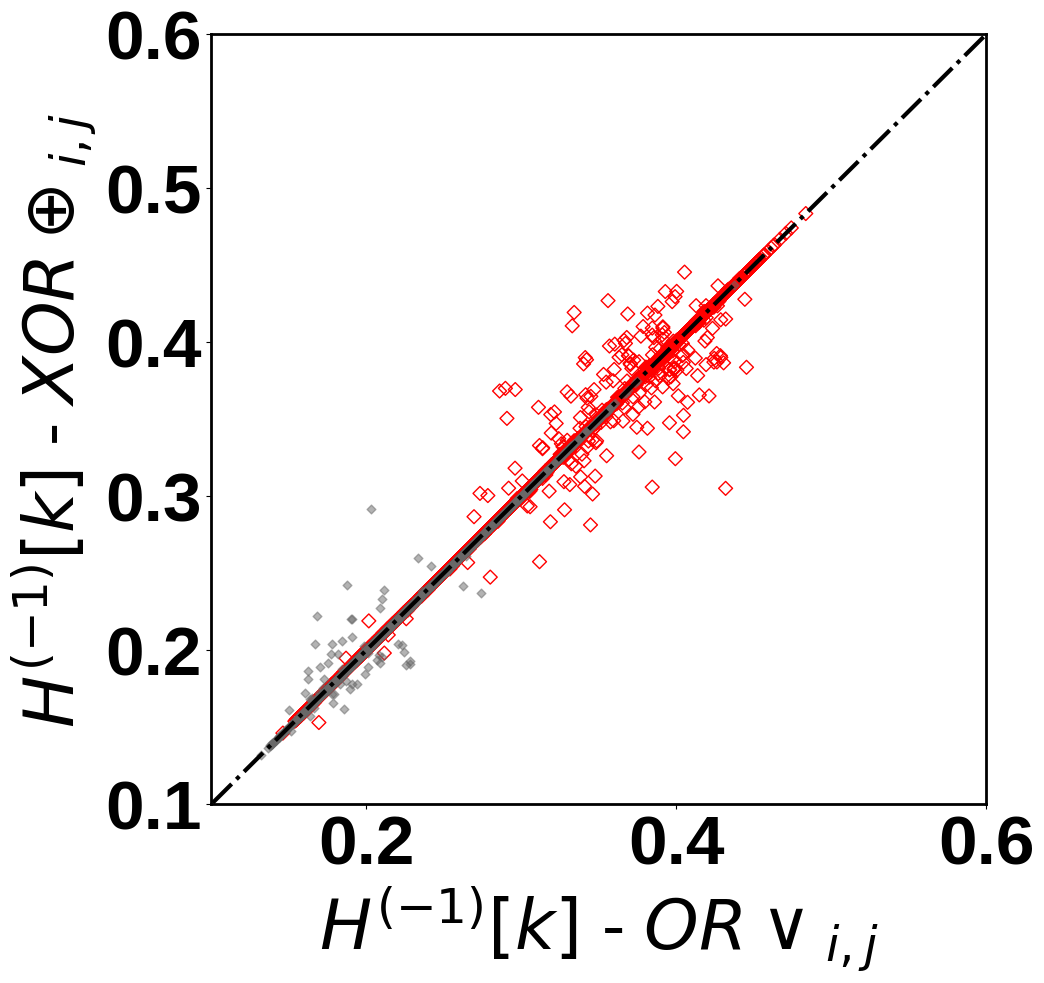

In [18]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/CA1_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="CA1"')[quant].values,df_possXOR.query('U_LOC=="CA1"')[quant].values, label='poss CA1 Neurons',  marker='D',alpha=0.5,color='dimgrey',s=mss-30)


ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

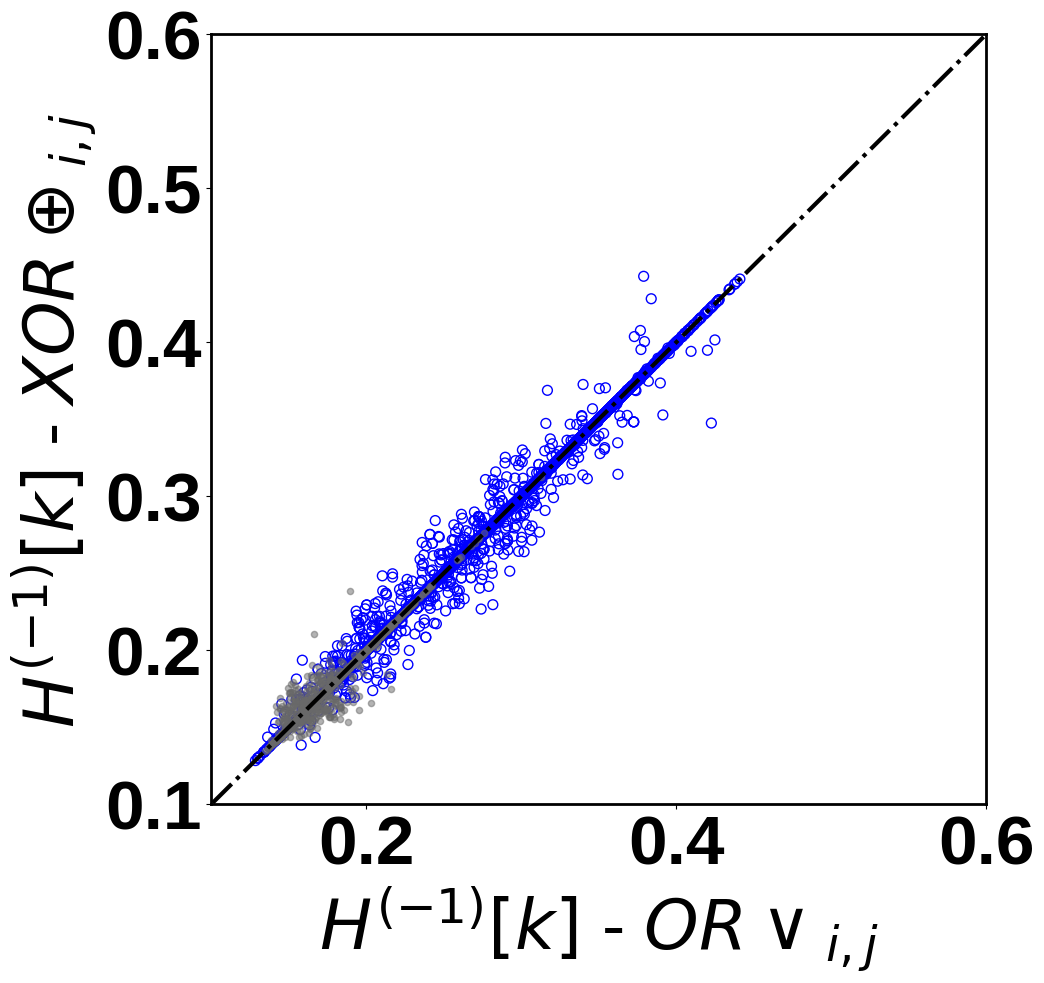

In [19]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/SUB_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="SUB"')[quant].values,df_possXOR.query('U_LOC=="SUB"')[quant].values, label='poss SUB Neurons',  marker='o', alpha=0.5,color='dimgrey',s=mss-30)

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [20]:
#For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=-0.05;

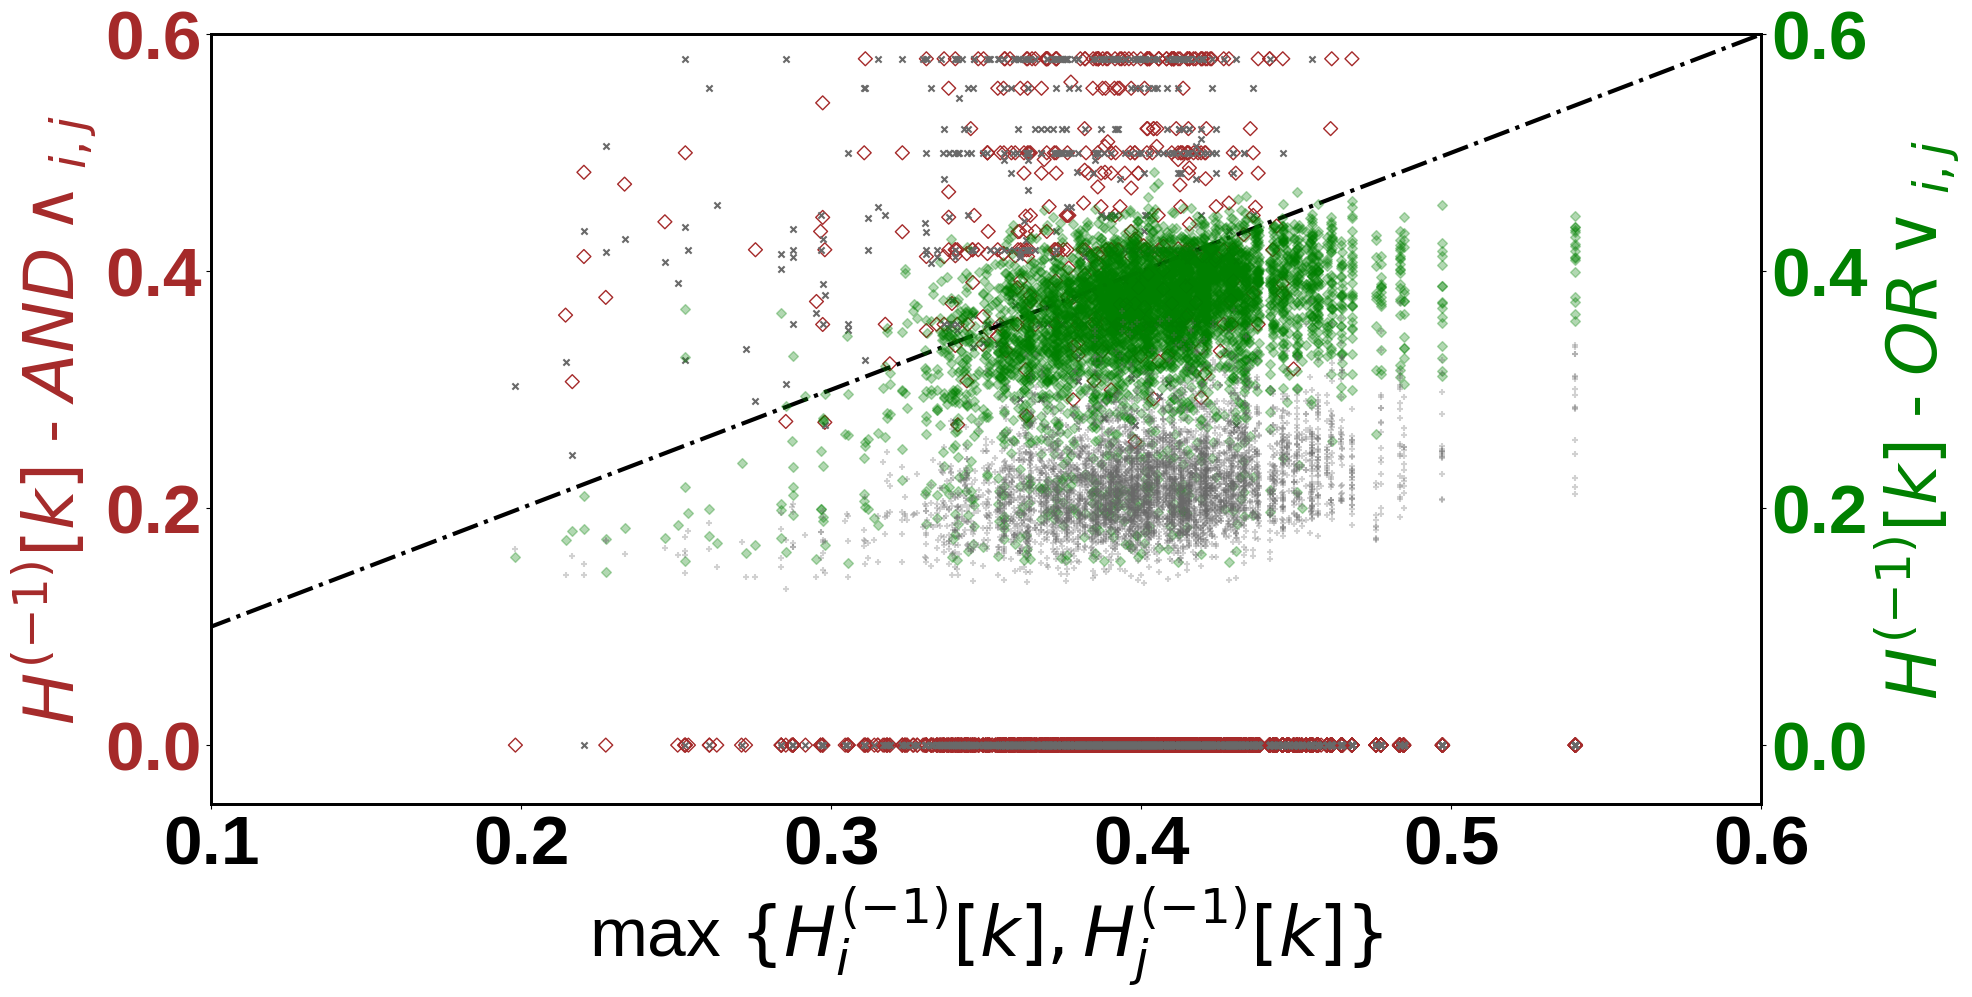

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHK_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');


ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D',facecolors='none',edgecolors=clr,s=mss )

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30)


ax.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'



for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D',color=clr,s=mss/2,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)



ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');       
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="CA1" and OHK>R_OHK_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and OHK<R_OHK_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<OHK<R_OHK_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and OHK==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


# ax.text(0.3, 0.4,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

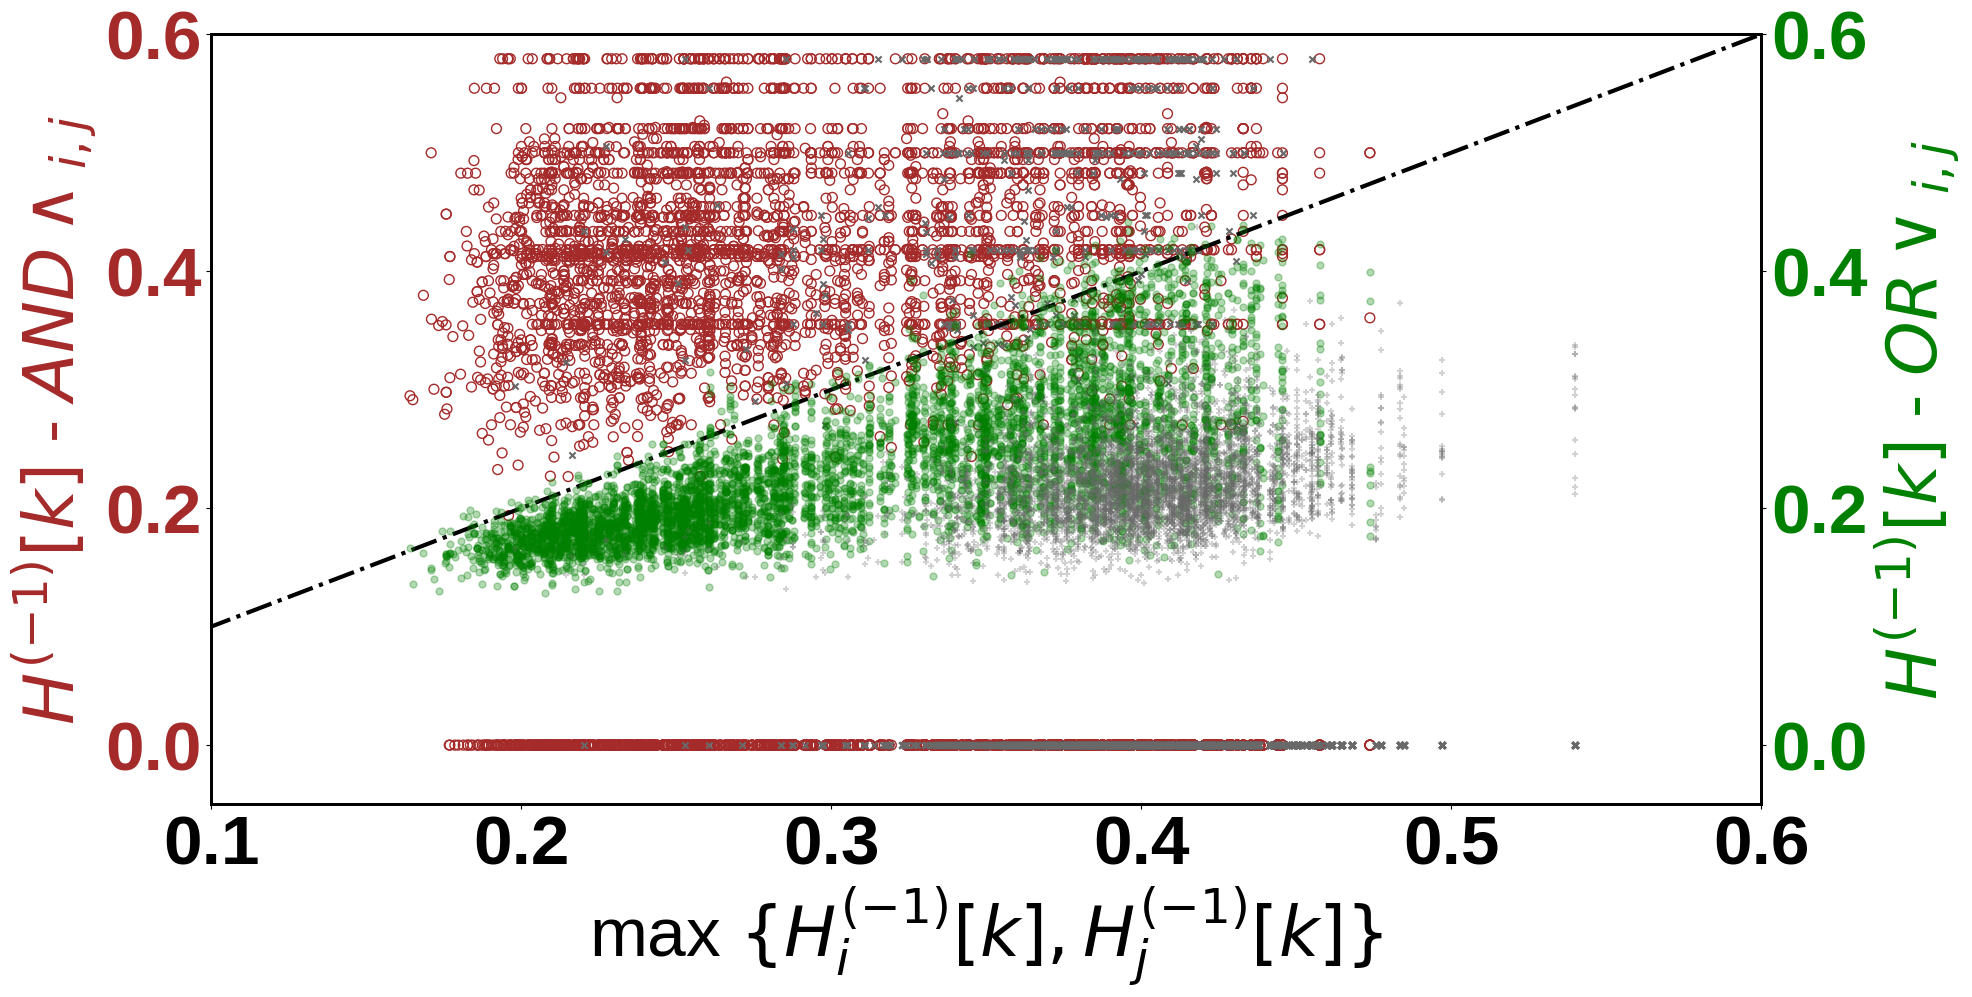

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHK_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o',facecolors='none',edgecolors=clr,s=mss)

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30)


ax.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2 ,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)


ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and OHK>R_OHK_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and OHK<R_OHK_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<OHK<R_OHK_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and OHK==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


# ax.text(0.3, 0.4,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

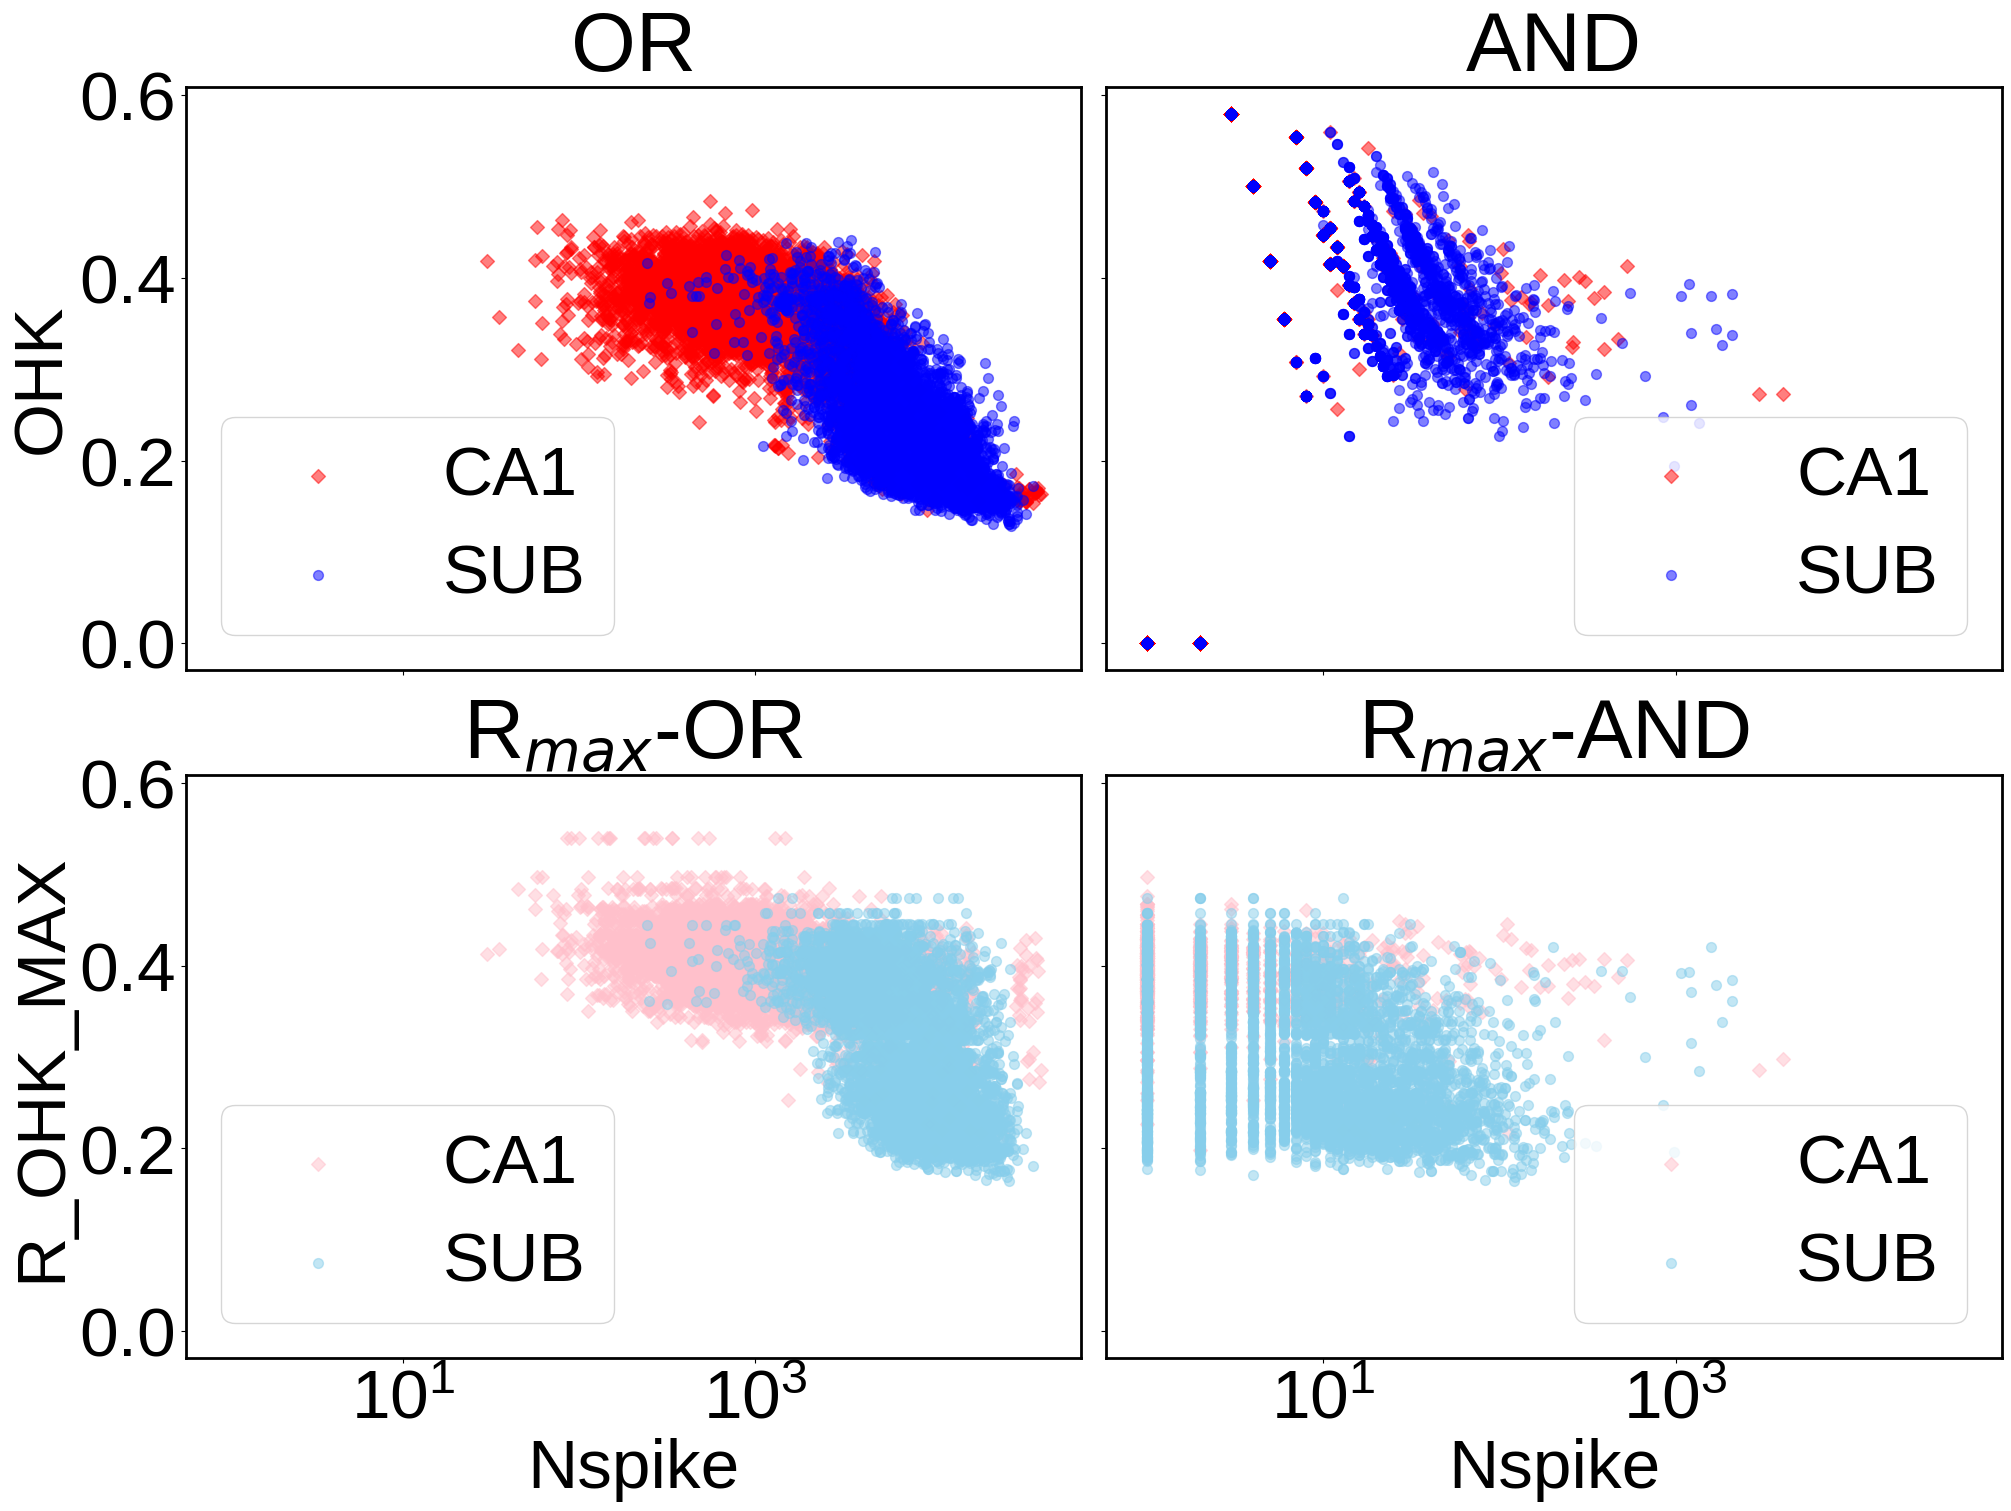

In [23]:
figname='../figures/OHK_LoPvNspike.pdf'

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)

plt.show()

# OHS -- Individual Figures of the subplot for all recordings combined

In [24]:
quant='OHS'

#For OHS
qmin=0.5;qmax=1.1; 

##OHS
#xqmax=0.6;xqmin=0.1;
yqmax=1.1;yqmin=-0.05;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [25]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
          'poss'+quant:df_possOR.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],

            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
         'poss'+quant:df_possAND.query('U1_GID==' + str(b.values[1]) + ' & U2_GID==' + str(b.values[2]))[quant].values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)



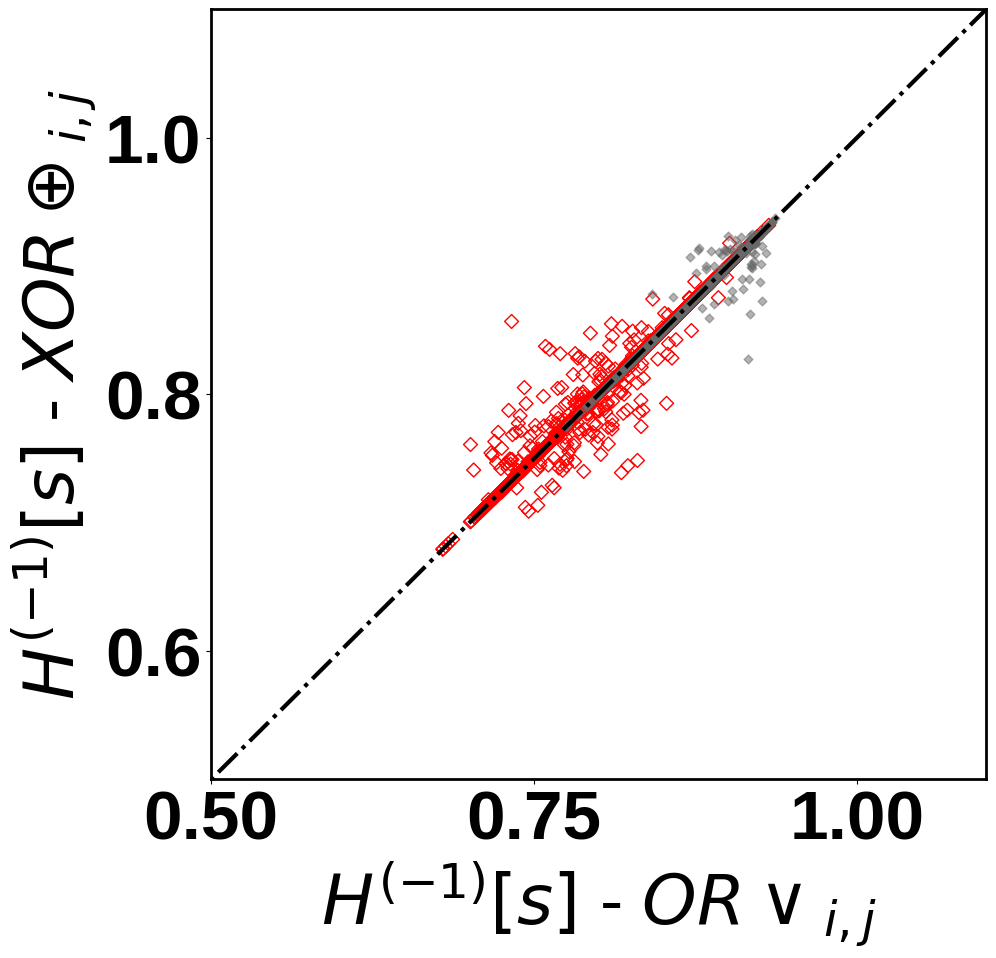

In [26]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/CA1_OHS_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="CA1"')[quant].values,df_possXOR.query('U_LOC=="CA1"')[quant].values, label='poss CA1 Neurons',  marker='D',alpha=0.5,color='dimgrey',s=mss-30)


ax1.set_xlabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[s]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

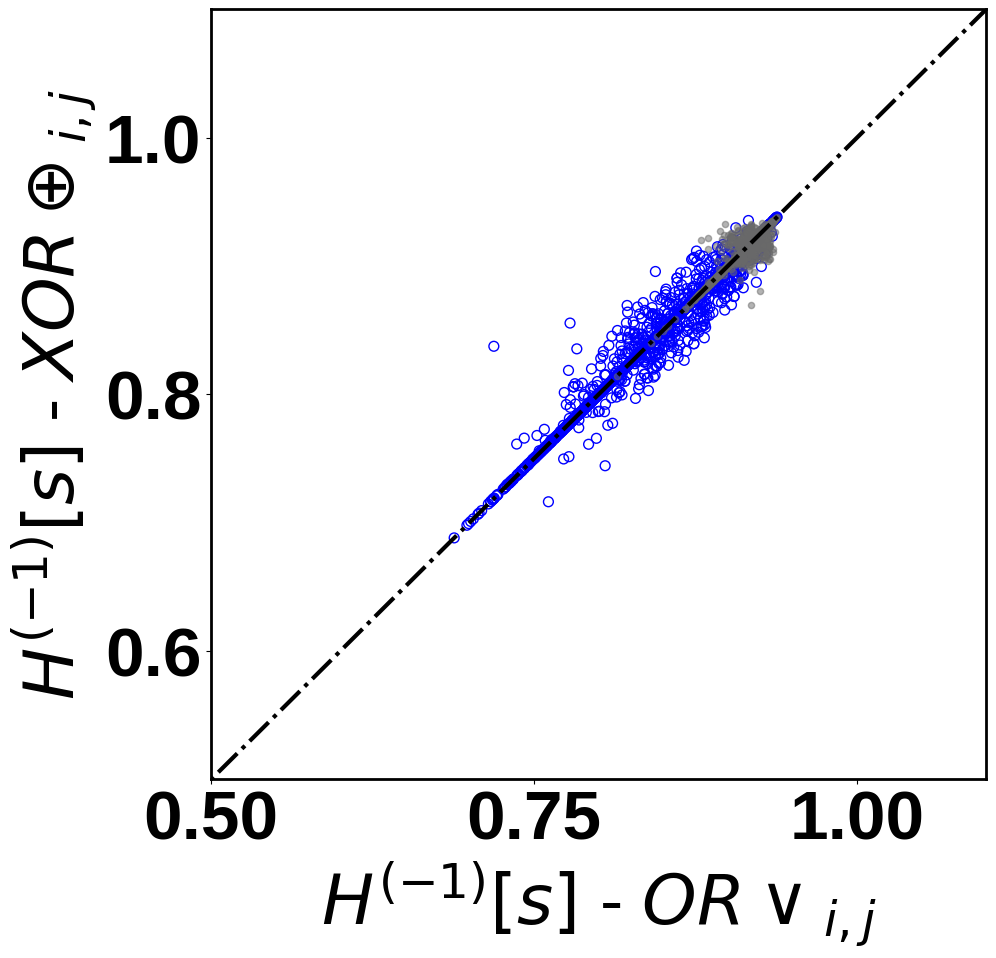

In [27]:
fig, ax1 = plt.subplots(figsize=(10,10))
figname='../figures/SUB_OHS_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

#Poission Spike Trains
ax1.scatter(df_possOR.query('U_LOC=="SUB"')[quant].values,df_possXOR.query('U_LOC=="SUB"')[quant].values, label='poss SUB Neurons',  marker='o', alpha=0.5,color='dimgrey',s=mss-30)


# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[s]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

In [28]:
quant='OHS'

#For OHS
qmin=0.5;qmax=1.1; 

##OHS
#xqmax=0.6;xqmin=0.1;
yqmax=1.1;yqmin=-0.05;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


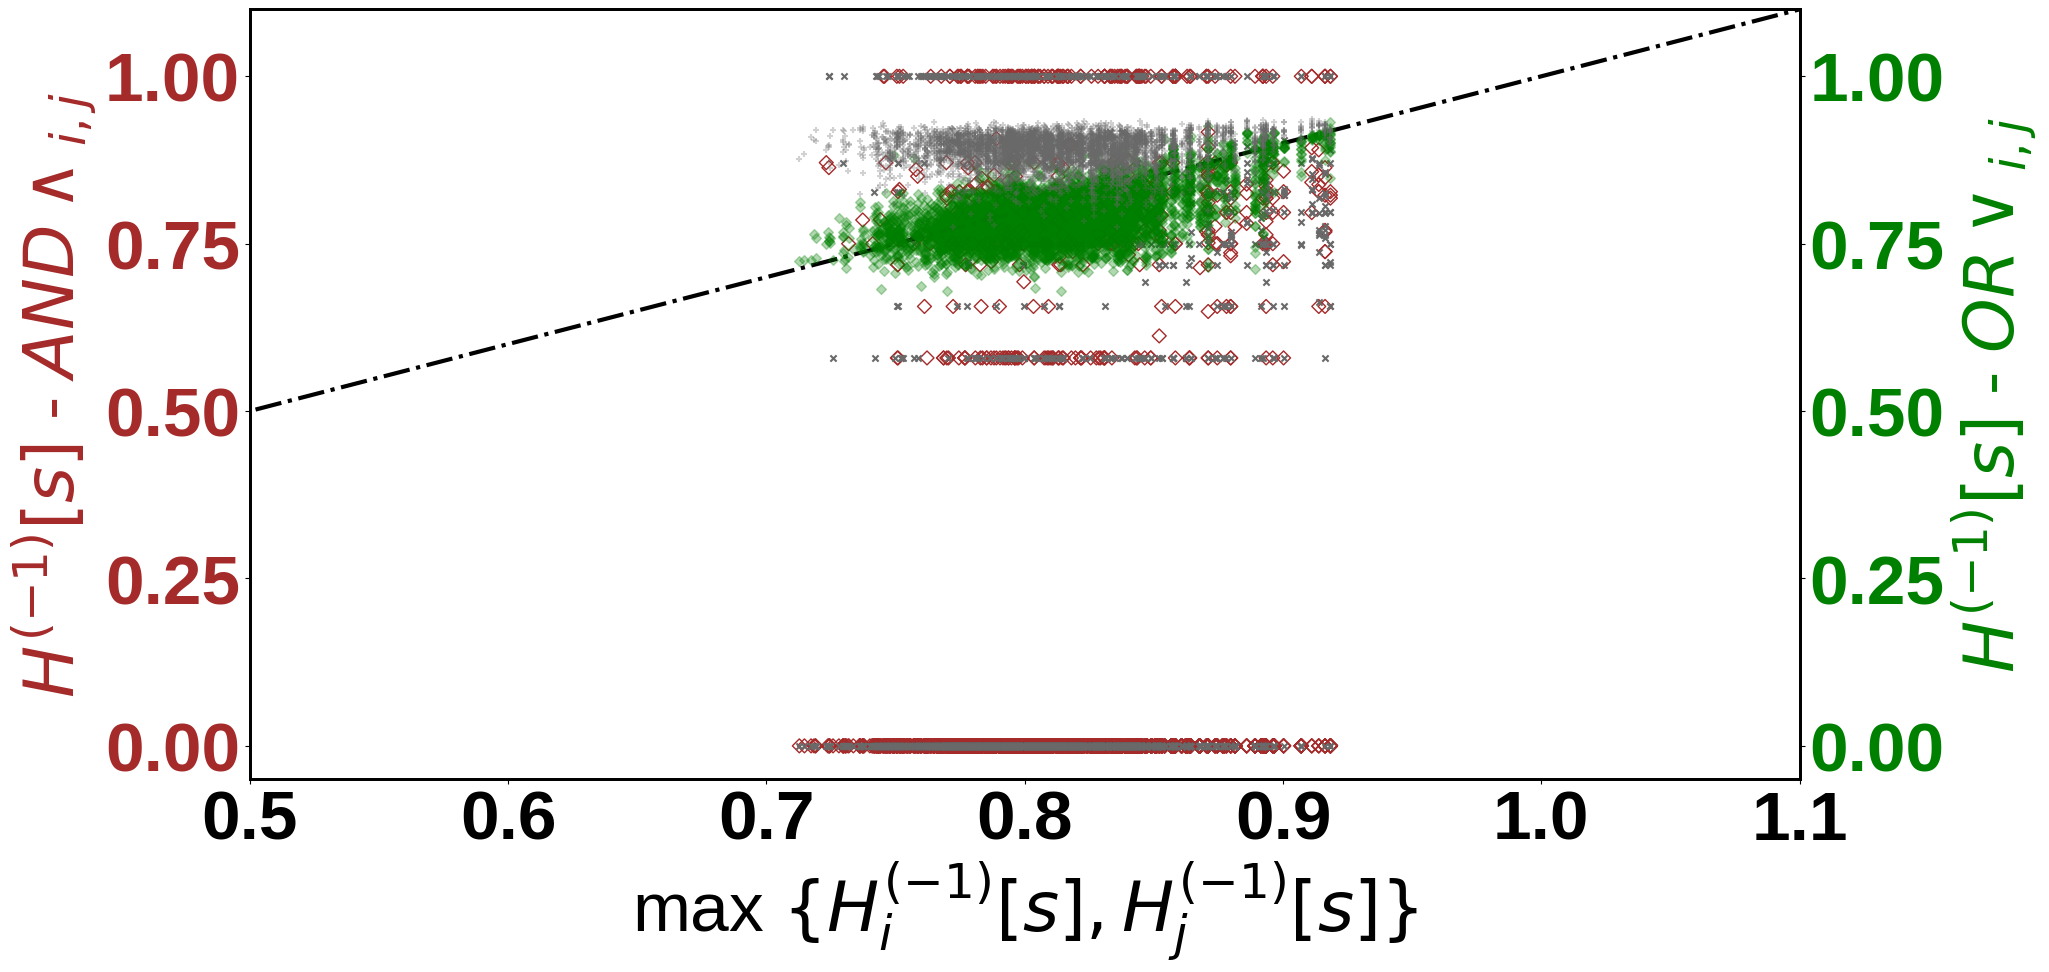

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHS_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.set_xlabel(r'max $\{ H^{(-1)}_i[s] , H^{(-1)}_j[s] \}$');


ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D',facecolors='none',edgecolors=clr,s=mss )

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30)


ax.set_ylabel(r'$H^{(-1)}[s]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'



for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D',color=clr,s=mss/2,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)




ax_twin.set_ylabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');       
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="CA1" and OHS>R_OHS_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and OHS<R_OHS_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<OHS<R_OHS_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and OHS>R_OHS_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and OHS==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


# ax.text(0.3, 0.4,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

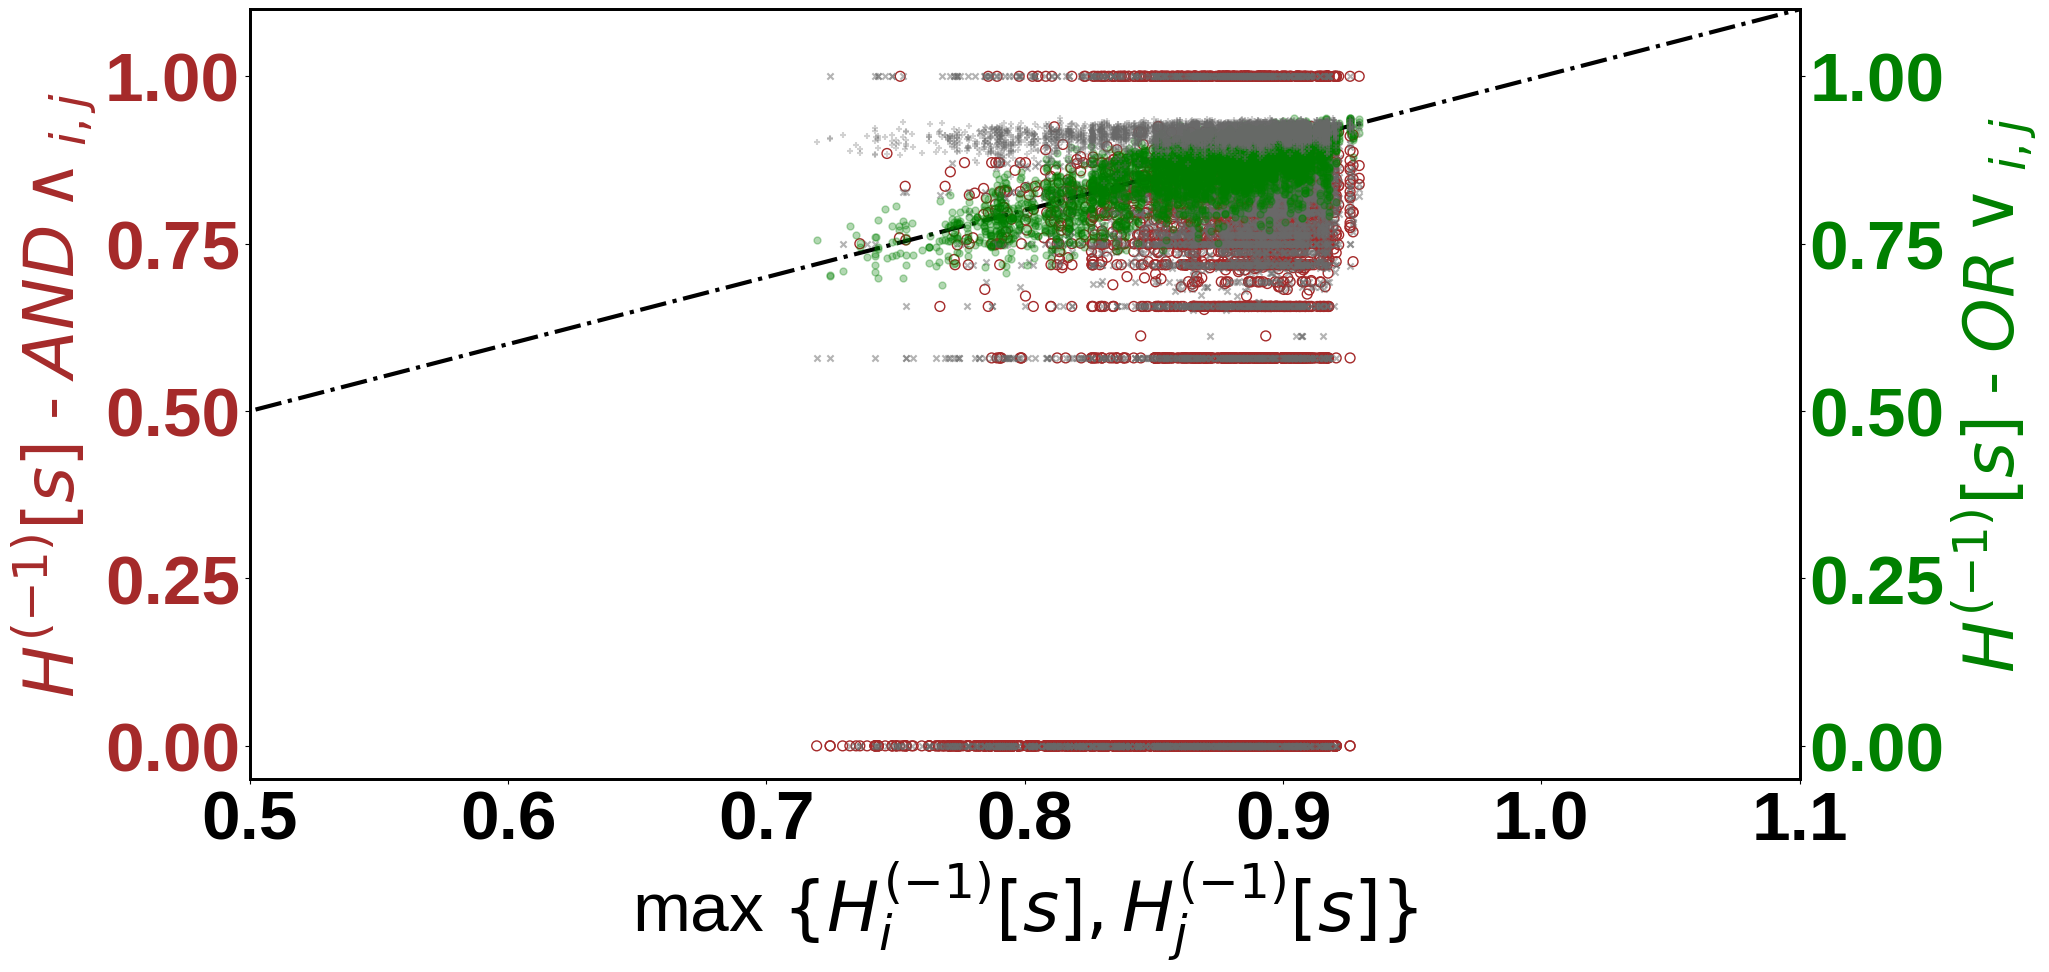

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHS_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{ H^{(-1)}_i[s] , H^{(-1)}_j[s] \}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o',facecolors='none',edgecolors=clr,s=mss)

ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')['poss'+quant].values,
         label='possANDed CA1 Neurons', marker='x',color='dimgrey',s=mss-30,alpha=0.5)

ax.set_ylabel(r'$H^{(-1)}[s]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2 ,alpha=0.3)

ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')['poss'+quant].values,label='possORed CA1 Neurons', marker='+', color='dimgrey',s=mss/2,alpha=0.3)


ax_twin.set_ylabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and OHS>R_OHS_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and OHS<R_OHS_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<OHS<R_OHS_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and OHS>R_OHS_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and OHS==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


# ax.text(0.3, 0.4,   
#         r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
#         r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
#         r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
#          transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

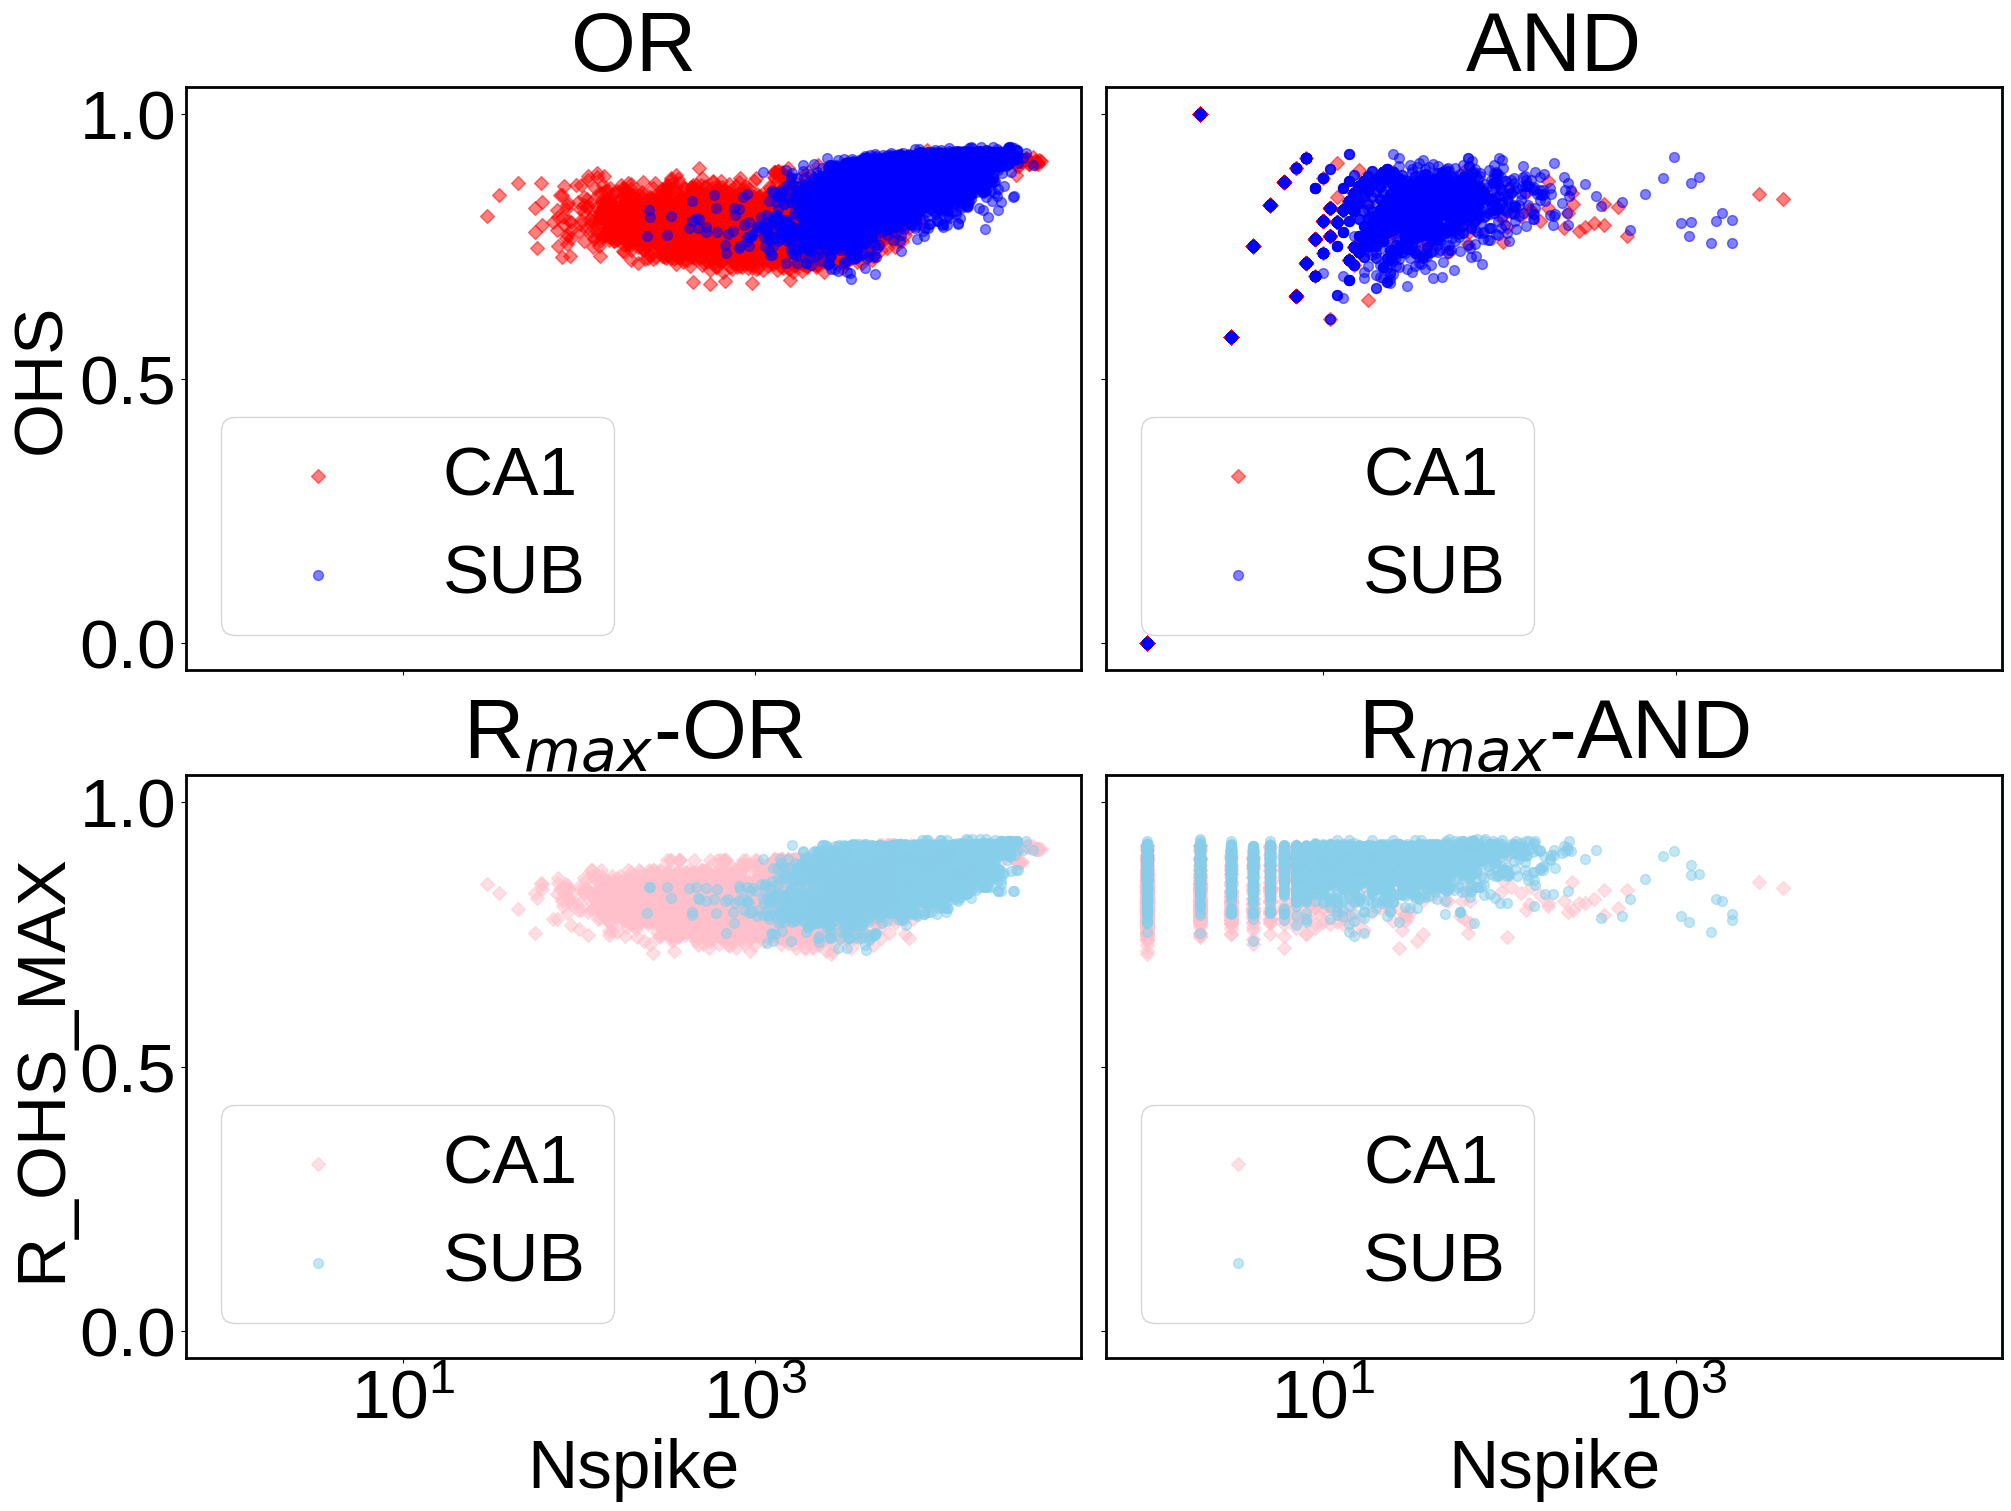

In [31]:
figname='../figures/OHS_LoPvNspike.pdf'

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)

plt.show()

# Checking against the Recording dates for a given Neuron pair

In [12]:
path2="../../Codes_5/data_extract/"
df2=pd.read_json(path2+"Rat_"+str(rat)+"_data_extracted.json");
df2['LOC']=df2['LOC'].apply(lambda x: x[1] if len(x)>1 else x[0])
df2.columns

Index(['RAT_ID', 'NeuID', 'N_DID', 'N_GID', 'LOC', 'STAT', 'rSCC', 'bScore',
       'hdScore', 'u_spiketime', 'task', 'U_GID', 'time_range', 'duration',
       'REC_Date', 'X', 'Y', 't', 'HD', 'MDirection', 'Speed', 'pmap'],
      dtype='object')

In [85]:
# for i,j in df.groupby(['N1_DID','N2_DID']).groups:
#     tmps=df.query('N1_DID==' + str(i) + '& N2_DID==' + str(j)+ ' & OP=="OR"')
#     print(tmps[['N1_NeuID', 'N1_DID', 'N2_NeuID', 'N2_DID']])
#     print(tmps)

# N1=477; N2=449;

# row1=df2.query('N_DID==' + str(N1));
# row2=df2.query('N_DID==' + str(N2));

# for ele1,ele2 in set(tuple(t) for t in product(row1['U_GID'].values[0], row2['U_GID'].values[0]) if t[0] != t[1]):
#     print(ele1,ele2)
#     a,b=row1['U_GID'].values[0],row2['U_GID'].values[0]
#     for ele1,ele2 in set(tuple(t) for t in product(row1['U_GID'].values[0], row2['U_GID'].values[0]) if t[0] != t[1]):
#                 if (row1['duration'].values[0][a.index(ele1)]>=60*chunksize) and (row2['duration'].values[0][b.index(ele2)]>=60*chunksize): 
#                     print(ele1,ele2) 
#                     # Intreating over all possible recordings of those Neuron pairs
#                     sdf=dt.query('U1_GID==' + str(ele1) + ' & U2_GID==' + str(ele2))
#                     print(sdf.iloc[:,3:17])

Testing Parallelization of the Code

In [116]:
import multiprocessing as mp

In [136]:
dfs=df2.iloc[4:10,:]
dfs.U_GID,dfs.duration

SyntaxError: invalid syntax (1177092025.py, line 2)

In [19]:
for ele1,ele2 in set(tuple(t) for t in product([1,2,3], [7,8]) if t[0] != t[1]):
    print(ele1,ele2)

3 8
2 7
3 7
1 8
1 7
2 8


In [15]:
trs=pd.DataFrame()
for (row_index1, row1), (row_index2, row2) in combinations(df2.iterrows(), 2):
        # Intreating over all possible unique Neuron Combinations
        if (row1['LOC']==row2['LOC']):
                #Making Sure the Locations are same coz for a recording session (because sdf comes from ratdata which is created from pairs recorded in same seesion and segregated by location ), any pair of neurons will have same location
                # assert row1['LOC']==row2['LOC'], "Locations are not same"+row1['LOC']+"--"+row2['LOC']
                for ele1,ele2 in set(tuple(t) for t in product(row1['U_GID'], row2['U_GID']) if t[0] != t[1]):
                        if (row1['duration'][row1['U_GID'].index(ele1)]>=60*chunksize) and (row2['duration'][row2['U_GID'].index(ele2)]>=60*chunksize):  
                                if(ele1==10191 or ele2==10191):
                                        print(ele1,ele2)
        
#                                 # Intreating over all possible recordings of those Neuron pairs
#                                 sdf=dt.query('U1_GID==' + str(ele1) + ' & U2_GID==' + str(ele2))
#                                 if not sdf.empty: #if pair is found in the rat_data
                                        
#                                         # print("Neurons: ",row1['NeuID'],row1['N_DID'],row1['N_GID'],row1['LOC'], "--",row2['NeuID'],row2['N_DID'],row2['N_GID'],row2['LOC'])
#                                         # print("Units: ", ele1,ele2)
#                                         # print("Found")
                                
#                                         #Adding the single recording Information of the pair to the DataFrame
#                                         sdf=pd.concat([sdf, 
#                                                         dt.query('U1_GID==' + str(ele1) + '& OP=="NA"'),
#                                                         dt.query('U1_GID==' + str(ele2) + '& OP=="NA"')], ignore_index=True)
                                        
#                                         #inserting the Neuron References to the DataFrame
#                                         sdf.insert(3, "N1_NeuID", row1['NeuID'])
#                                         sdf.insert(4, "N1_DID", row1['N_DID'])
#                                         sdf.insert(5, "N1_GID", row1['N_GID'])
                                        
#                                         sdf.insert(10, "N2_NeuID", row2['NeuID'])
#                                         sdf.insert(11, "N2_DID", row2['N_DID'])
#                                         sdf.insert(12, "N2_GID", row2['N_GID'])
                                        
#                                         sdf.insert(13, "N_LOC", row1['LOC'])
#                                         #print(sdf.iloc[:,3:17],"done")
#                                         trs=pd.concat([trs,sdf],ignore_index=True)
# trs.query('OP=="OR"').iloc[:,3:17]

10028 10191
10032 10191
10036 10191
10042 10191
10046 10191
10050 10191
10054 10191
10058 10191
10056 10191
10060 10191
10062 10191
10066 10191
10070 10191
10074 10191
10078 10191
10080 10191
10086 10191
10091 10191
10095 10191
10099 10191
10109 10191
10111 10191
10115 10191
10119 10191
10121 10191
10127 10191
10130 10191
10136 10191
10140 10191
10146 10191
10191 10160
10191 10163
10191 10175
10191 10178
10191 10183
10191 10189
10191 10196
10191 10201
10191 10206
10191 10208
10191 10210
10191 10218
10191 10225
10191 10228
10191 10232
10191 10257
10191 10259
10191 10263
10191 10265
10191 10270
10191 10267
10191 10274
10191 10272
10191 10278
10191 10280
10191 10282
10191 10286
10191 10284
10191 10288
10191 10290
10191 10292
10191 10294
10191 10295
10191 10220


In [138]:
def wf(parameters):
    dfP=pd.DataFrame()
    (row_index1, row1), (row_index2, row2) = parameters
    for ele1,ele2 in set(tuple(t) for t in product(row1['U_GID'], row2['U_GID']) if t[0] != t[1]):
                    if (row1['duration'][row1['U_GID'].index(ele1)]>=60*chunksize) and (row2['duration'][row2['U_GID'].index(ele2)]>=60*chunksize):  
                            # Intreating over all possible recordings of those Neuron pairs
                            sdf=dt.query('U1_GID==' + str(ele1) + ' & U2_GID==' + str(ele2))
                            if not sdf.empty: #if pair is found in the rat_data
                                    
                                    # print("Neurons: ",row1['NeuID'],row1['N_DID'],row1['N_GID'],row1['LOC'], "--",row2['NeuID'],row2['N_DID'],row2['N_GID'],row2['LOC'])
                                    # print("Units: ", ele1,ele2)
                                    # print("Found")
                            
                                    #Adding the single recording Information of the pair to the DataFrame
                                    sdf=pd.concat([sdf, 
                                                    dt.query('U1_GID==' + str(ele1) + '& OP=="NA"'),
                                                    dt.query('U1_GID==' + str(ele2) + '& OP=="NA"')], ignore_index=True)
                                    
                                    #inserting the Neuron References to the DataFrame
                                    sdf.insert(3, "N1_NeuID", row1['NeuID'])
                                    sdf.insert(4, "N1_DID", row1['N_DID'])
                                    sdf.insert(5, "N1_GID", row1['N_GID'])
                                    
                                    sdf.insert(10, "N2_NeuID", row2['NeuID'])
                                    sdf.insert(11, "N2_DID", row2['N_DID'])
                                    sdf.insert(12, "N2_GID", row2['N_GID'])
                                    
                                    sdf.insert(13, "N_LOC", row1['LOC'])
                                    dfP=pd.concat([dfP,sdf], ignore_index=True)
    return dfP

In [139]:
pool = mp.Pool(4) 
future_res = [pool.apply_async(wf, (param,)) for param in combinations(dfs.iterrows(), 2) if param[0][1]['LOC'] == param[1][1]['LOC']]
# Close the pool and wait for the work to finish
pool.close()
pool.join()
res=pd.DataFrame()
for p in future_res:
    r=p.get()
    if not r.empty:
        res=pd.concat([res,r], ignore_index=True)
res.query('OP=="OR"').iloc[:,3:17]

N1_NeuID  N1_DID  N1_GID U_LOC  U1_GID  OP  U2_GID  N2_NeuID  N2_DID  \
1        550     406   13413   CA1    9817  OR    9830       551     407   
9        550     406   13413   CA1    9822  OR    9831       552     408   
17       550     406   13413   CA1    9817  OR    9842       554     410   
25       550     406   13413   CA1    9822  OR    9847       554     410   
33       551     407   13414   CA1    9830  OR    9842       554     410   
41       552     408   13415   CA1    9831  OR    9847       554     410   
49       553     409   13416   CA1    9836  OR    9849       555     411   

    N2_GID N_LOC  Nspikes       MSR       MHK  
1    13414   CA1     2349  0.289735  0.489658  
9    13415   CA1     2842  0.289465  0.478030  
17   13417   CA1     3507  0.289464  0.480754  
25   13417   CA1     5469  0.286330  0.468443  
33   13417   CA1     2206  0.294299  0.482626  
41   13417   CA1     4661  0.289297  0.468619  
49   13418   CA1     3686  0.292181  0.479508

Trying to verify from opposite way by grouping by recording dates but not possible because multiple sessions per day

In [ ]:
df2.query('N_DID==' + str(N1)).REC_Date.values, df2.query('N_DID==' + str(N1)).U_GID.values,df2.query('N_DID==' + str(N1)).duration.values,df2.query('N_DID==' + str(N2)).REC_Date.values, df2.query('N_DID==' + str(N2)).U_GID.values,df2.query('N_DID==' + str(N2)).duration.values

(array([list(['31/07/15', '31/07/15', '03/08/15', '04/08/15', '04/08/15', '05/08/15', '05/08/15', '06/08/15', '06/08/15', '07/08/15', '07/08/15', '10/08/15', '10/08/15', '11/08/15', '11/08/15', '12/08/15', '12/08/15', '13/08/15', '13/08/15', '14/08/15', '14/08/15', '17/08/15', '18/08/15'])],
       dtype=object),
 array([list([4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935])],
       dtype=object),
 array([list([1328.0000105032814, 1274.6484645032906, 1354.4241255032557, 935.1614985032502, 646.5094975032553, 1104.0241765032697, 852.1142785032571, 1360.967240503256, 854.1275455032519, 1335.046441503262, 1286.476400503263, 1378.8349745032028, 1204.6874725032249, 1572.1085035032593, 1312.6488585032057, 1395.696076503256, 1363.4838225032545, 1423.126825503256, 1202.9258655032536, 1146.554419503256, 2021.8217775032572, 1708.0039525032553, 1214.5021445032562])],
       dtype=object),
 array([list(['31/0

In [ ]:
days=list(set(df2.query('N_DID==' + str(N1)).REC_Date.values[0]).intersection(df2.query('N_DID==' + str(N2)).REC_Date.values[0]))
for dates in days:
    idx1=np.argwhere(np.array(df2.query('N_DID==' + str(N1)).REC_Date.values[0]) == dates)[:,0];
    idx2=np.argwhere(np.array(df2.query('N_DID==' + str(N2)).REC_Date.values[0]) == dates)[:,0]
    print(dates)
    print(df2.query('N_DID==' + str(N1)).U_GID.values[0][idx1[0]:idx1[-1]+1],df2.query('N_DID==' + str(N1)).duration.values[0][idx1[0]:idx1[-1]+1])
    print(df2.query('N_DID==' + str(N2)).U_GID.values[0][idx2[0]:idx2[-1]+1],df2.query('N_DID==' + str(N2)).duration.values[0][idx1[0]:idx1[-1]+1])

05/08/15
[4918, 4919] [1104.0241765032697, 852.1142785032571]
[5095, 5096] [1104.0241765032697, 852.1142785032571]
31/07/15
[4913, 4914] [1328.0000105032814, 1274.6484645032906]
[5090, 5091] [1328.0000105032814, 1274.6484645032906]
03/08/15
[4915] [1354.4241255032557]
[5092] [1354.4241255032557]
04/08/15
[4916, 4917] [935.1614985032502, 646.5094975032553]
[5093, 5094] [935.1614985032502, 646.5094975032553]
18/08/15
[4935] [1214.5021445032562]
[5113] [1708.0039525032553]
13/08/15
[4930, 4931] [1423.126825503256, 1202.9258655032536]
[5107, 5108] [1423.126825503256, 1202.9258655032536]
07/08/15
[4922, 4923] [1335.046441503262, 1286.476400503263]
[5099, 5100] [1335.046441503262, 1286.476400503263]
10/08/15
[4924, 4925] [1378.8349745032028, 1204.6874725032249]
[5101, 5102] [1378.8349745032028, 1204.6874725032249]
17/08/15
[4934] [1708.0039525032553]
[5111, 5112] [1690.8911935032563]
12/08/15
[4928, 4929] [1395.696076503256, 1363.4838225032545]
[5105, 5106] [1395.696076503256, 1363.483822503

In [ ]:
df.query('N1_DID==' + str(N1) + '& N2_DID==' + str(N2)+ '& OP=="OR"').iloc[:,3:17]

N1_NeuID  N1_DID  N1_GID U_LOC  U1_GID  OP  U2_GID  N2_NeuID  N2_DID  \
785       239     102   13109   SUB    4913  OR    5090       265     128   
793       239     102   13109   SUB    4914  OR    5091       265     128   
801       239     102   13109   SUB    4915  OR    5092       265     128   
809       239     102   13109   SUB    4920  OR    5097       265     128   
817       239     102   13109   SUB    4922  OR    5099       265     128   
825       239     102   13109   SUB    4923  OR    5100       265     128   
833       239     102   13109   SUB    4924  OR    5101       265     128   
841       239     102   13109   SUB    4925  OR    5102       265     128   
849       239     102   13109   SUB    4926  OR    5103       265     128   
857       239     102   13109   SUB    4927  OR    5104       265     128   
865       239     102   13109   SUB    4928  OR    5105       265     128   
873       239     102   13109   SUB    4929  OR    5106       265     128   
881       239     102   13109   SUB    4930  OR    5107       265     128   
889       239     102   13109   SUB    4931  OR    5108       265     128   
897       239     102   13109   SUB    4933  OR    5110       265     128   

     N2_GID N_LOC  Nspikes       MSR       MHK  
785   13135   SUB     9988  0.259647  0.430099  
793   13135   SUB     8578  0.264037  0.440927  
801   13135   SUB     8423  0.269482  0.442357  
809   13135   SUB     9653  0.264542  0.430400  
817   13135   SUB    10165  0.262119  0.428859  
825   13135   SUB    10007  0.261870  0.427003  
833   13135   SUB    13784  0.265733  0.442462  
841   13135   SUB    11458  0.261140  0.426430  
849   13135   SUB     9889  0.260872  0.425780  
857   13135   SUB    11814  0.260143  0.423726  
865   13135   SUB     8655  0.264664  0.439051  
873   13135   SUB     9116  0.261470  0.428131  
881   13135   SUB     8841  0.263618  0.428632  
889   13135   SUB    11169  0.264461  0.431750  
897   13135   SUB    13366  0.263015  0.434749

In [ ]:
# for i,j in df.groupby(['N1_DID','N2_DID']).groups:
#     tmps=df.query('N1_DID==' + str(i) + '& N2_DID==' + str(j)+ ' & OP=="OR"')
#     print(tmps[['N1_NeuID', 'N1_DID', 'N2_NeuID', 'N2_DID']])
#     print(tmps)


In [ ]:
# op_tmps=tmps.query('OP=="OR"')[['N1_NeuID', 'N1_DID', 'N1_GID', 'N2_NeuID', 'N2_DID', 'N2_GID', 
#          'Nspikes', 'MSR', 'MHK', 'MHS', 'dt_MHK', 'OHK', 'OHS', 'dt_OHK','max_HSHK']].mean().to_frame().T
# op_tmps=op_tmps.astype({'N1_NeuID':int, 'N1_DID':int, 'N1_GID':int, 'N2_NeuID':int, 'N2_DID':int, 'N2_GID':int})
# op_tmps.insert(0, 'Rat_ID', rat)
# assert np.array_equal(tmps.U_LOC.values,tmps.N_LOC.values)
# op_tmps.insert(1, 'LOC', tmps.U_LOC.values[0])
# sdd=df.query('OP=="NA"')[['MSR', 'MHK', 'MHS', 'dt_MHK', 'OHK', 'OHS', 'dt_OHK','max_HSHK']].max().to_frame().T
# sdd.rename(columns={col: 'Rmax_'+col for col in sdd.columns}, inplace=True)
# op_tmps = pd.concat([op_tmps,sdd], axis=1)